# Import all the libraries

Install the librabies

In [247]:
install.packages('readxl')
install.packages('ggmosaic')
install.packages('tm')
install.packages('epiDisplay')
install.packages('viridis')
install.packages("ggsci")
install.packages("kableExtra")
install.packages("arules")
install.packages("arulesViz")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Import the library

In [248]:
library(plyr)
library(ggplot2)
library(tidyr)
library(readr)
library(ggmosaic)
library(readxl)
library(data.table)
library(tm)
library(stringr)
library(epiDisplay)
library(viridis)
library(tidyverse)
library(ggsci)
library(DT)
library(arules)
library(arulesViz)



options(warn = -1)


# Load the Datasets

In [249]:
Purchase <- read.csv('https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_purchase_behaviour.csv')

url <- 'https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_transaction_data.xlsx'
lcl <- basename(url)
download.file(url = url, destfile = lcl)

Transactional <- read_excel(lcl)

# Look into the data



1.   Purchase Behaviour


In [250]:
head(Purchase)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
,<int>,<chr>,<chr>
1,1000,YOUNG SINGLES/COUPLES,Premium
2,1002,YOUNG SINGLES/COUPLES,Mainstream
3,1003,YOUNG FAMILIES,Budget
4,1004,OLDER SINGLES/COUPLES,Mainstream
5,1005,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,YOUNG SINGLES/COUPLES,Budget


2. Transactional Data

In [251]:
head(Transactional)

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


In [252]:
summary(Purchase)

 LYLTY_CARD_NBR     LIFESTAGE         PREMIUM_CUSTOMER  
 Min.   :   1000   Length:72637       Length:72637      
 1st Qu.:  66202   Class :character   Class :character  
 Median : 134040   Mode  :character   Mode  :character  
 Mean   : 136186                                        
 3rd Qu.: 203375                                        
 Max.   :2373711                                        

In [253]:
summary(Transactional)

      DATE         STORE_NBR     LYLTY_CARD_NBR        TXN_ID       
 Min.   :43282   Min.   :  1.0   Min.   :   1000   Min.   :      1  
 1st Qu.:43373   1st Qu.: 70.0   1st Qu.:  70021   1st Qu.:  67602  
 Median :43464   Median :130.0   Median : 130358   Median : 135138  
 Mean   :43464   Mean   :135.1   Mean   : 135550   Mean   : 135158  
 3rd Qu.:43555   3rd Qu.:203.0   3rd Qu.: 203094   3rd Qu.: 202701  
 Max.   :43646   Max.   :272.0   Max.   :2373711   Max.   :2415841  
    PROD_NBR       PROD_NAME            PROD_QTY         TOT_SALES      
 Min.   :  1.00   Length:264836      Min.   :  1.000   Min.   :  1.500  
 1st Qu.: 28.00   Class :character   1st Qu.:  2.000   1st Qu.:  5.400  
 Median : 56.00   Mode  :character   Median :  2.000   Median :  7.400  
 Mean   : 56.58                      Mean   :  1.907   Mean   :  7.304  
 3rd Qu.: 85.00                      3rd Qu.:  2.000   3rd Qu.:  9.200  
 Max.   :114.00                      Max.   :200.000   Max.   :650.000  

In [254]:
str(Purchase)

'data.frame':	72637 obs. of  3 variables:
 $ LYLTY_CARD_NBR  : int  1000 1002 1003 1004 1005 1007 1009 1010 1011 1012 ...
 $ LIFESTAGE       : chr  "YOUNG SINGLES/COUPLES" "YOUNG SINGLES/COUPLES" "YOUNG FAMILIES" "OLDER SINGLES/COUPLES" ...
 $ PREMIUM_CUSTOMER: chr  "Premium" "Mainstream" "Budget" "Mainstream" ...


In [255]:
str(Transactional)

tibble [264,836 × 8] (S3: tbl_df/tbl/data.frame)
 $ DATE          : num [1:264836] 43390 43599 43605 43329 43330 ...
 $ STORE_NBR     : num [1:264836] 1 1 1 2 2 4 4 4 5 7 ...
 $ LYLTY_CARD_NBR: num [1:264836] 1000 1307 1343 2373 2426 ...
 $ TXN_ID        : num [1:264836] 1 348 383 974 1038 ...
 $ PROD_NBR      : num [1:264836] 5 66 61 69 108 57 16 24 42 52 ...
 $ PROD_NAME     : chr [1:264836] "Natural Chip        Compny SeaSalt175g" "CCs Nacho Cheese    175g" "Smiths Crinkle Cut  Chips Chicken 170g" "Smiths Chip Thinly  S/Cream&Onion 175g" ...
 $ PROD_QTY      : num [1:264836] 2 3 2 5 3 1 1 1 1 2 ...
 $ TOT_SALES     : num [1:264836] 6 6.3 2.9 15 13.8 5.1 5.7 3.6 3.9 7.2 ...


Since the DATA column is in Numeric format, convert it into Date format.

In [256]:
Transactional$DATE <- as.Date(Transactional$DATE, origin = '1900-01-01')

In [257]:
unique(Purchase['LIFESTAGE'])

,LIFESTAGE
,<chr>
1,YOUNG SINGLES/COUPLES
3,YOUNG FAMILIES
4,OLDER SINGLES/COUPLES
5,MIDAGE SINGLES/COUPLES
7,NEW FAMILIES
10,OLDER FAMILIES
11,RETIREES


Generating a basic summary on the 'PROD_NAME' Column.  

In [258]:
unique(Transactional['PROD_NAME'])

PROD_NAME
<chr>
Natural Chip Compny SeaSalt175g
CCs Nacho Cheese 175g
Smiths Crinkle Cut Chips Chicken 170g
Smiths Chip Thinly S/Cream&Onion 175g
Kettle Tortilla ChpsHny&Jlpno Chili 150g
Old El Paso Salsa Dip Tomato Mild 300g
Smiths Crinkle Chips Salt & Vinegar 330g
Grain Waves Sweet Chilli 210g
Doritos Corn Chip Mexican Jalapeno 150g


Make a frequency table of all the products in 'PROD_NAME'.

In [259]:
Transactional_Table <- table(Transactional['PROD_NAME'])

In [260]:
head(Transactional_Table)


             Burger Rings 220g       CCs Nacho Cheese    175g 
                          1564                           1498 
             CCs Original 175g       CCs Tasty Cheese    175g 
                          1514                           1539 
Cheetos Chs & Bacon Balls 190g             Cheetos Puffs 165g 
                          1479                           1448 

In [261]:
Transactional_df <- as.data.frame(Transactional)

In [262]:
Product_Words <- data.table(unlist(strsplit(unique(Transactional_df[, 'PROD_NAME']),  " ")))

In [263]:
(Product_Words)

V1
<chr>
Natural
Chip
""
""
""
""
""
""
""


In [264]:
setnames(Product_Words, 'Words')

Filter out 'Chips' from the 'PROD_NAME' column.

In [265]:
Transactional_df_f <- dplyr::filter(Transactional_df, grepl('Chips', PROD_NAME))

In [266]:
head(Transactional_df_f)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
2,2019-05-18,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
3,2019-05-19,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
4,2019-05-17,19,19272,16686,44,Thins Chips Light& Tangy 175g,1,3.3
5,2019-05-20,45,45220,41651,22,Thins Chips Originl saltd 175g,1,3.3
6,2018-08-20,54,54305,48301,44,Thins Chips Light& Tangy 175g,2,6.6


In [267]:
summary(Transactional_df_f)

      DATE              STORE_NBR     LYLTY_CARD_NBR        TXN_ID      
 Min.   :2018-07-03   Min.   :  1.0   Min.   :   1004   Min.   :     5  
 1st Qu.:2018-10-02   1st Qu.: 70.0   1st Qu.:  70176   1st Qu.: 68504  
 Median :2019-01-01   Median :131.0   Median : 132218   Median :135896  
 Mean   :2019-01-01   Mean   :135.7   Mean   : 136057   Mean   :135763  
 3rd Qu.:2019-04-02   3rd Qu.:203.0   3rd Qu.: 203262   3rd Qu.:203382  
 Max.   :2019-07-02   Max.   :272.0   Max.   :2373711   Max.   :270209  
    PROD_NBR       PROD_NAME            PROD_QTY       TOT_SALES    
 Min.   :  1.00   Length:49770       Min.   :1.000   Min.   : 1.90  
 1st Qu.: 27.00   Class :character   1st Qu.:2.000   1st Qu.: 5.80  
 Median : 40.00   Mode  :character   Median :2.000   Median : 6.60  
 Mean   : 44.16                      Mean   :1.906   Mean   : 6.75  
 3rd Qu.: 75.00                      3rd Qu.:2.000   3rd Qu.: 7.60  
 Max.   :110.00                      Max.   :5.000   Max.   :28.50  

Count the number of transaction by date.

In [268]:
Transactional_df_f_count <- aggregate(TXN_ID~DATE, Transactional_df_f[!duplicated(Transactional_df_f,),], length) 

In [269]:
head(Transactional_df_f_count)

,DATE,TXN_ID
,<date>,<int>
1,2018-07-03,121
2,2018-07-04,129
3,2018-07-05,136
4,2018-07-06,119
5,2018-07-07,134
6,2018-07-08,149


In [270]:
tail(Transactional_df_f_count)

,DATE,TXN_ID
,<date>,<int>
359,2019-06-27,152
360,2019-06-28,127
361,2019-06-29,127
362,2019-06-30,159
363,2019-07-01,139
364,2019-07-02,149


In [271]:
dim(Transactional_df_f_count)

[1] 364   2

Since the total number of dates in 'DATE' columnn = 364, hence find the missing date. 

In [272]:
Full_Seq_Date <- seq.Date(from = min(Transactional_df_f_count$DATE), to = max(Transactional_df_f_count$DATE), by = 1)
Missing <- Full_Seq_Date[!Full_Seq_Date %in% Transactional_df_f_count$DATE]

In [273]:
Missing

[1] "2018-12-27"

The missing date is '27-12-2018', this could be attributed as a holiday after a heavy sales during the holiday season. 

### Plot of Transactions over time

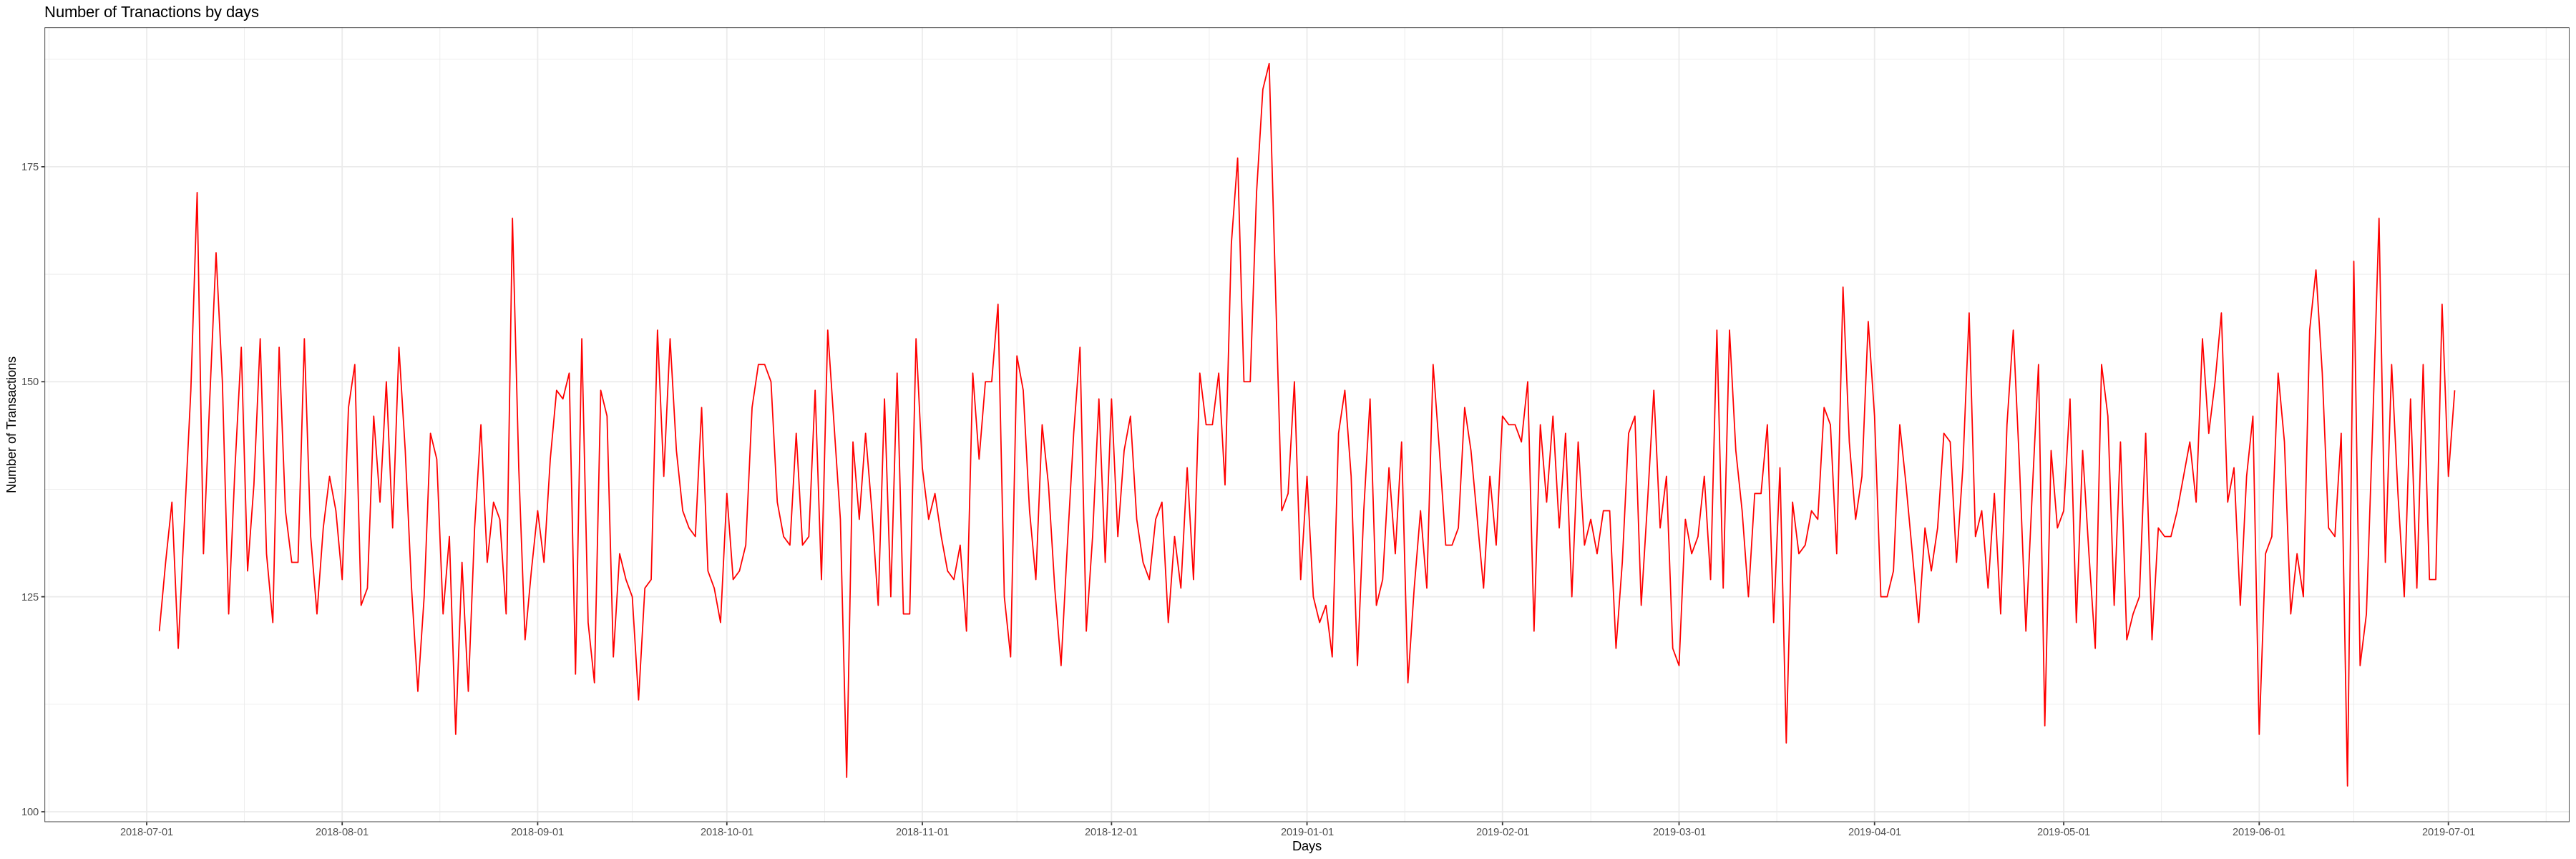

In [274]:
options(repr.plot.width = 30, repr.plot.height = 10) #setting height and width of the plot.

ggplot(Transactional_df_f_count, aes(x = DATE, y = TXN_ID))+
geom_line(col = "#FF0000")+
labs(x = "Days", y = 'Number of Transactions', title = 'Number of Tranactions by days')+
scale_x_date(breaks = "1 month")+
theme_bw()

In [275]:
summary(Transactional_df_f_count)

      DATE                TXN_ID     
 Min.   :2018-07-03   Min.   :103.0  
 1st Qu.:2018-10-01   1st Qu.:127.0  
 Median :2019-01-01   Median :135.0  
 Mean   :2019-01-01   Mean   :136.7  
 3rd Qu.:2019-04-02   3rd Qu.:145.0  
 Max.   :2019-07-02   Max.   :187.0  

In [276]:
dim(Transactional_df_f_count)

[1] 364   2

Get the dates with transaction count of more than 170.

In [277]:
Transactional_df_f_count[Transactional_df_f_count$TXN_ID > 170,]

,DATE,TXN_ID
,<date>,<int>
7,2018-07-09,172
172,2018-12-21,176
175,2018-12-24,172
176,2018-12-25,184
177,2018-12-26,187


The Holiday season seems to be the dates with a abnormally more number of sales. 

### Plot of Transaction in the month of December.

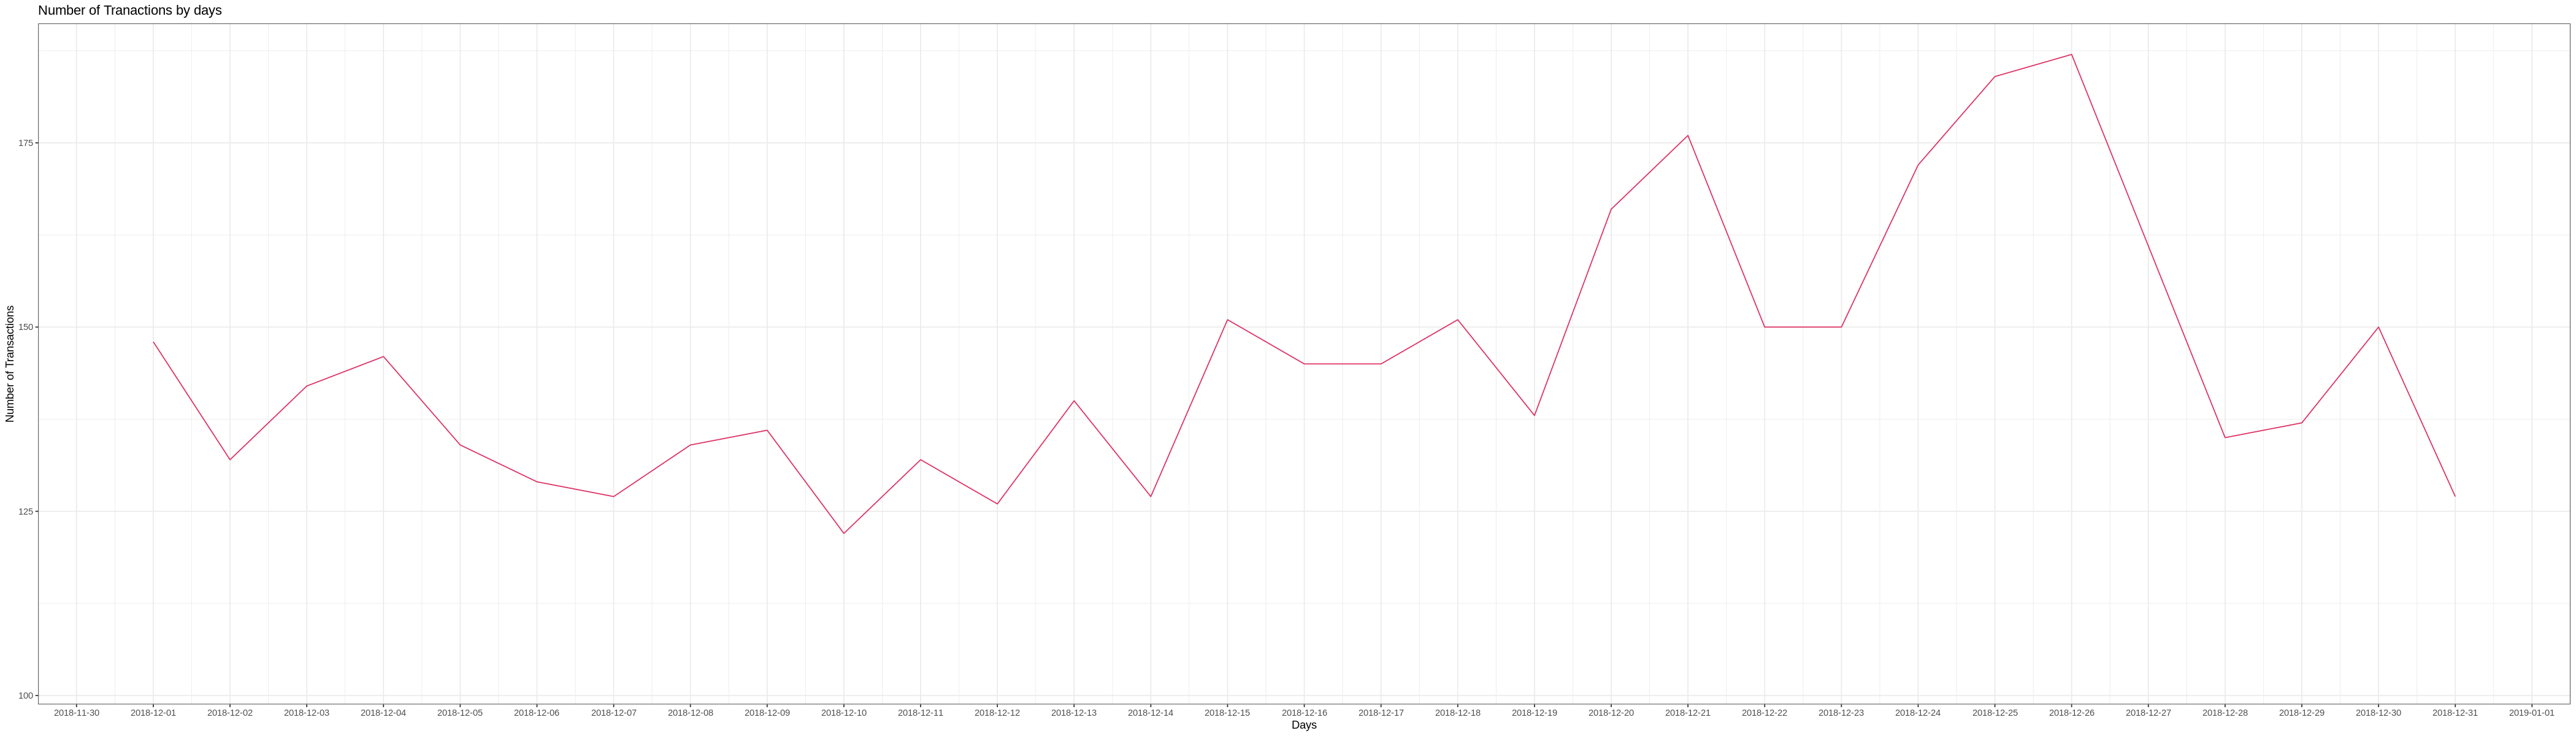

In [278]:
options(repr.plot.width = 35, repr.plot.height = 10)

ggplot(Transactional_df_f_count, aes(x = DATE, y = TXN_ID))+
geom_line(col = "#DE3163")+
labs(x = "Days", y = 'Number of Transactions', title = 'Number of Tranactions by days')+
scale_x_date(breaks = "1 day", limits = as.Date(c('2018-12-01', '2018-12-31')))+
theme_bw()

### Extract packet size of each chip packets from 'PROD_NAME' column.  

In [279]:
Pack_Size <- stringr::str_extract_all(Transactional_df$PROD_NAME, "\\d+\\.*\\d*")

In [280]:
head(Pack_Size)

[[1]]
[1] "175"

[[2]]
[1] "175"

[[3]]
[1] "170"

[[4]]
[1] "175"

[[5]]
[1] "150"

[[6]]
[1] "300"

In [281]:
Pack_Size <- as.numeric(Pack_Size)

In [282]:
summary(Pack_Size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   70.0   150.0   170.0   182.4   175.0   380.0 

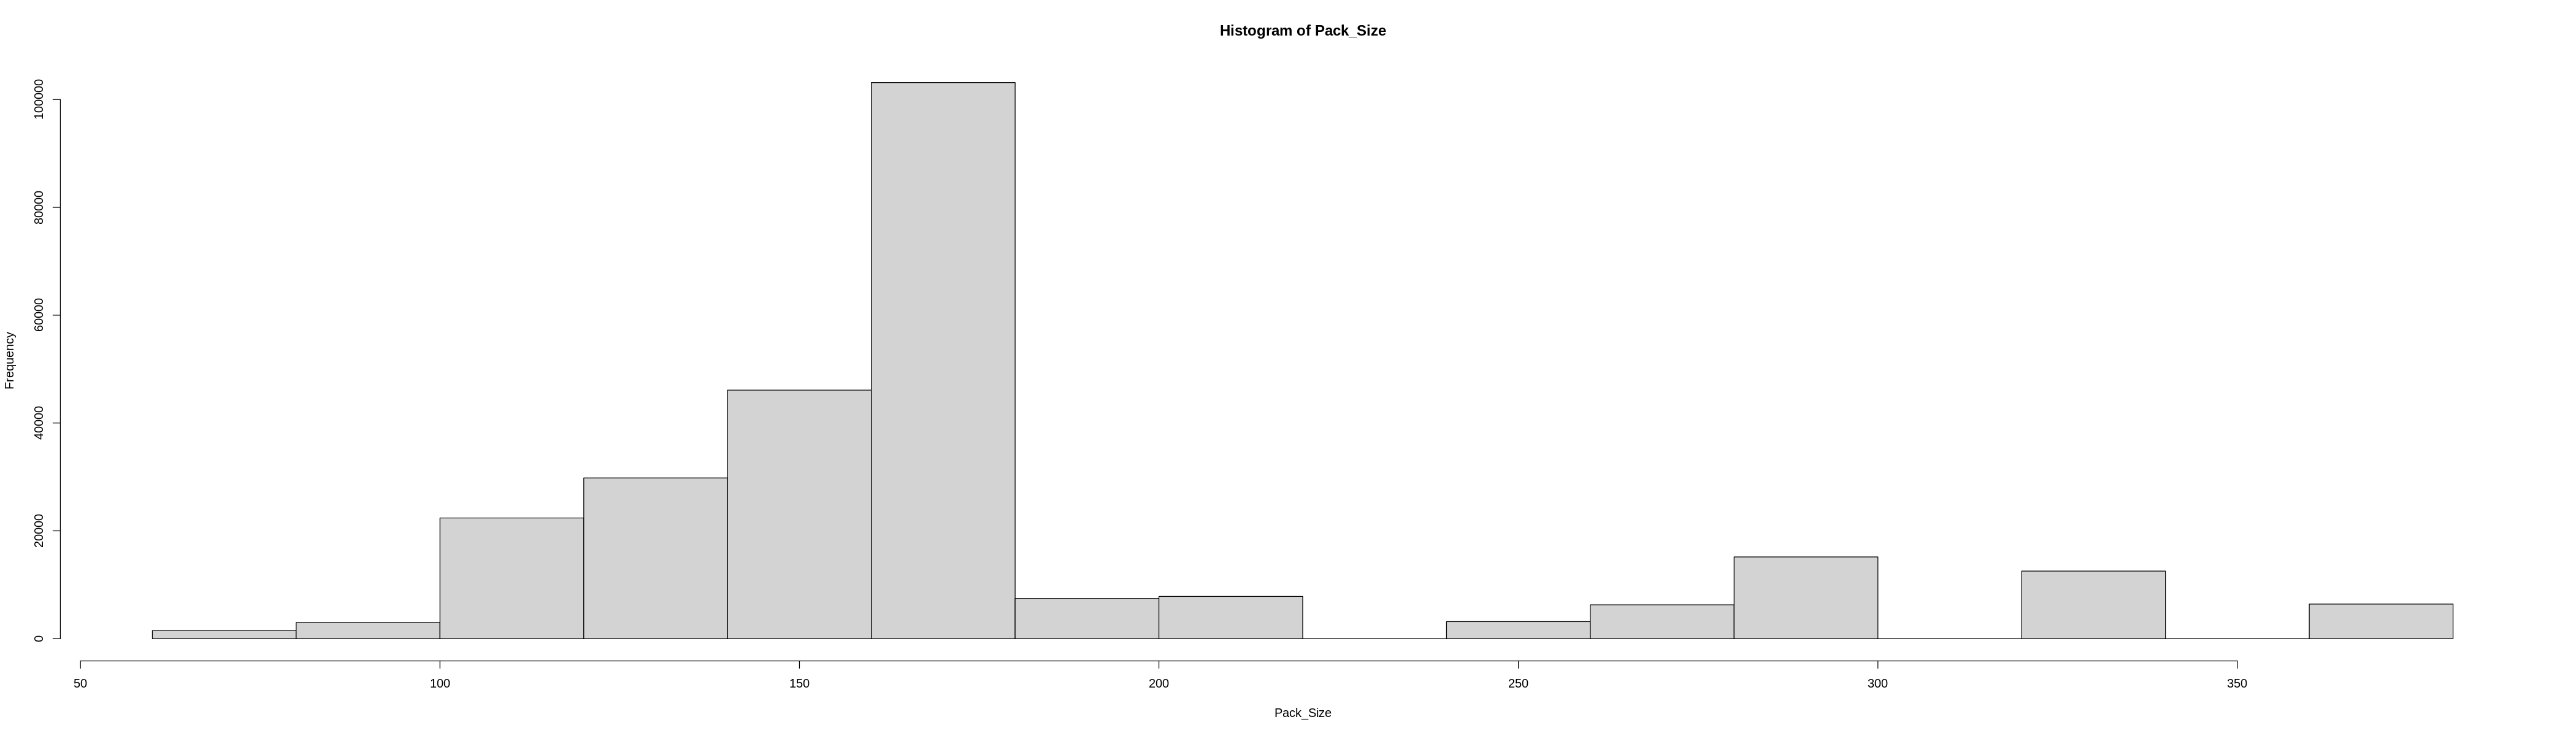

In [283]:
options(scipen = 999)

hist(Pack_Size)

### A Look into Brand names of Chips.

In [284]:
Brand <-Transactional_df %>%
  separate(PROD_NAME, into = "BRAND NAME")

In [285]:
head(Brand)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND NAME,PROD_QTY,TOT_SALES
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2018-10-19,1,1000,1,5,Natural,2,6.0
2,2019-05-16,1,1307,348,66,CCs,3,6.3
3,2019-05-22,1,1343,383,61,Smiths,2,2.9
4,2018-08-19,2,2373,974,69,Smiths,5,15.0
5,2018-08-20,2,2426,1038,108,Kettle,3,13.8
6,2019-05-21,4,4074,2982,57,Old,1,5.1


Since the soom of seems to be very similar,(looks like a mistype), hence correcting such entries. 

In [286]:
Brand$`BRAND NAME`<- sub(".*Dorito.*", "Doritos", Brand$`BRAND NAME`)
Brand$`BRAND NAME`<- sub(".*Infzns.*", "Infuzions", Brand$`BRAND NAME`)
Brand$`BRAND NAME`<- sub(".*RRD.*", "Red", Brand$`BRAND NAME`)
Brand$`BRAND NAME`<- sub(".*Snbts.*", "Sunbites", Brand$`BRAND NAME`)
Brand$`BRAND NAME`<- sub(".*WW.*", "Woolworths", Brand$`BRAND NAME`)
Brand$`BRAND NAME`<- sub(".*Smith.*", "Smiths", Brand$`BRAND NAME`)

### Taking a frequency distribution of Brand Names (using tab1 funtion from epiDisplay package.)

In [287]:
table(Brand$`BRAND NAME`)


    Burger        CCs    Cheetos   Cheezels       Cobs    Doritos     French 
      1564       4551       2927       4603       9693      28147       1418 
     Grain    GrnWves  Infuzions     Kettle    Natural        NCC        Old 
      6272       1468      14201      41288       6050       1419       9324 
  Pringles        Red     Smiths   Sunbites      Thins   Tostitos   Twisties 
     25102      17779      31823       3008      14075       9471       9454 
  Tyrrells Woolworths 
      6442      14757 

,Frequency,Percent,Cum. percent
Burger,1564,0.6,0.6
CCs,4551,1.7,2.3
Cheetos,2927,1.1,3.4
Cheezels,4603,1.7,5.2
Cobs,9693,3.7,8.8
Doritos,28147,10.6,19.4
French,1418,0.5,20.0
Grain,6272,2.4,22.3
GrnWves,1468,0.6,22.9
Infuzions,14201,5.4,28.3


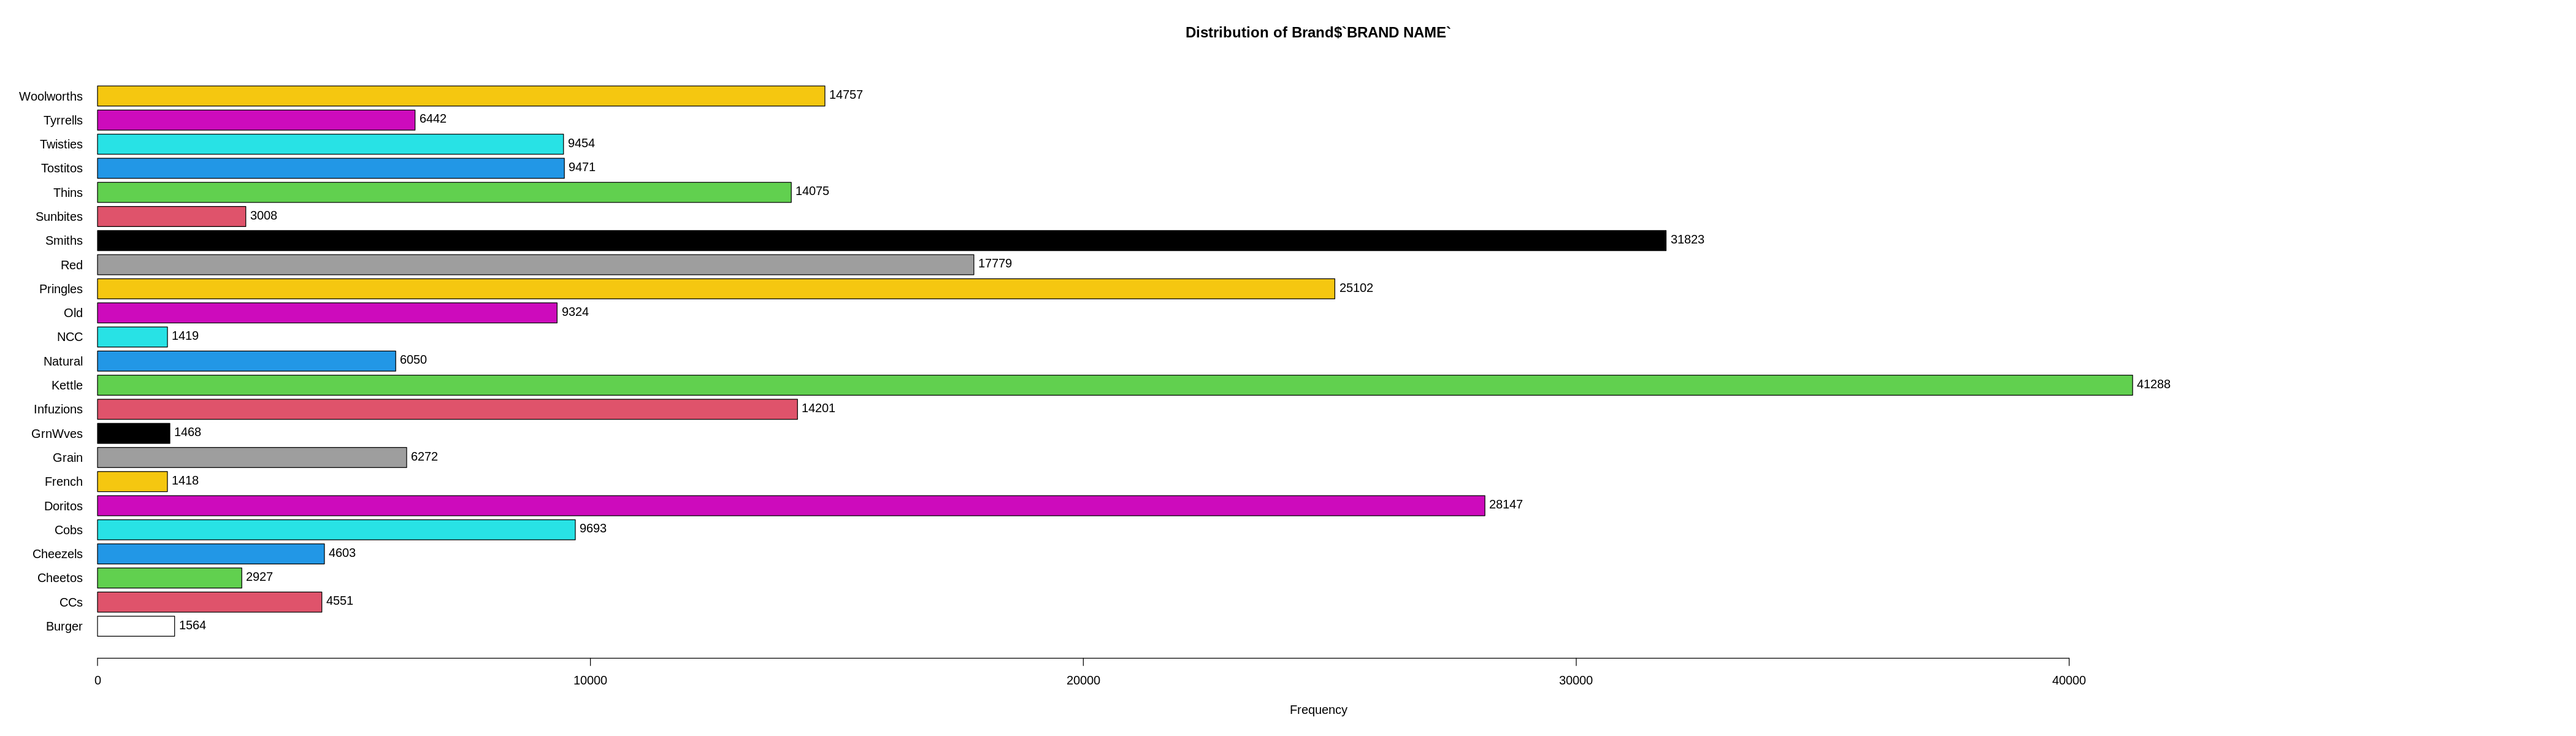

In [288]:
tab1(Brand$`BRAND NAME`)

### Examining Customer Data

In [289]:
head(Purchase)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
,<int>,<chr>,<chr>
1,1000,YOUNG SINGLES/COUPLES,Premium
2,1002,YOUNG SINGLES/COUPLES,Mainstream
3,1003,YOUNG FAMILIES,Budget
4,1004,OLDER SINGLES/COUPLES,Mainstream
5,1005,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,YOUNG SINGLES/COUPLES,Budget


Frequency Dsitribution of 'LIFESTAGE' column from 'Purchase' Dataset.

,Frequency,Percent,Cum. percent
MIDAGE SINGLES/COUPLES,7275,10.0,10.0
NEW FAMILIES,2549,3.5,13.5
OLDER FAMILIES,9780,13.5,27.0
OLDER SINGLES/COUPLES,14609,20.1,47.1
RETIREES,14805,20.4,67.5
YOUNG FAMILIES,9178,12.6,80.1
YOUNG SINGLES/COUPLES,14441,19.9,100.0
Total,72637,100.0,100.0


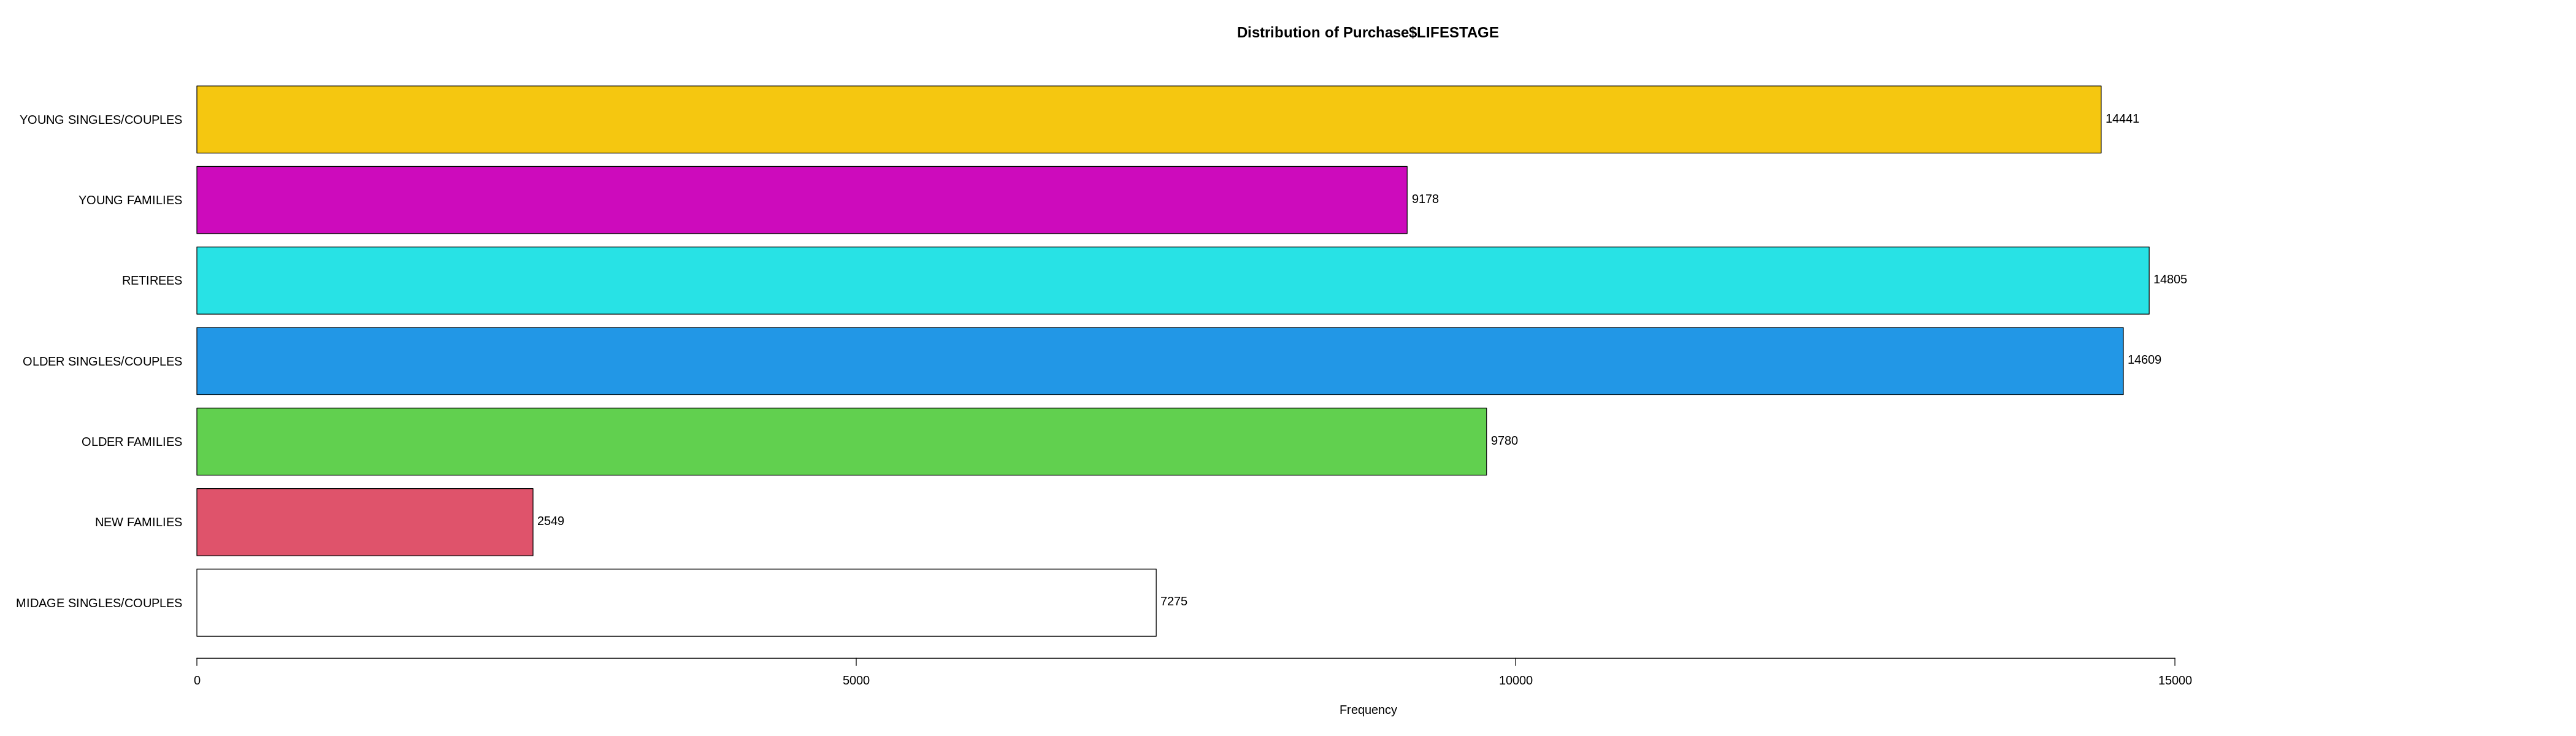

In [290]:
tab1(Purchase$LIFESTAGE)

Frequency Distribution of 'PREMIUM_CUSTOMER' column from 'Purchase' Dataset. 

,Frequency,Percent,Cum. percent
Budget,24470,33.7,33.7
Mainstream,29245,40.3,73.9
Premium,18922,26.1,100.0
Total,72637,100.0,100.0


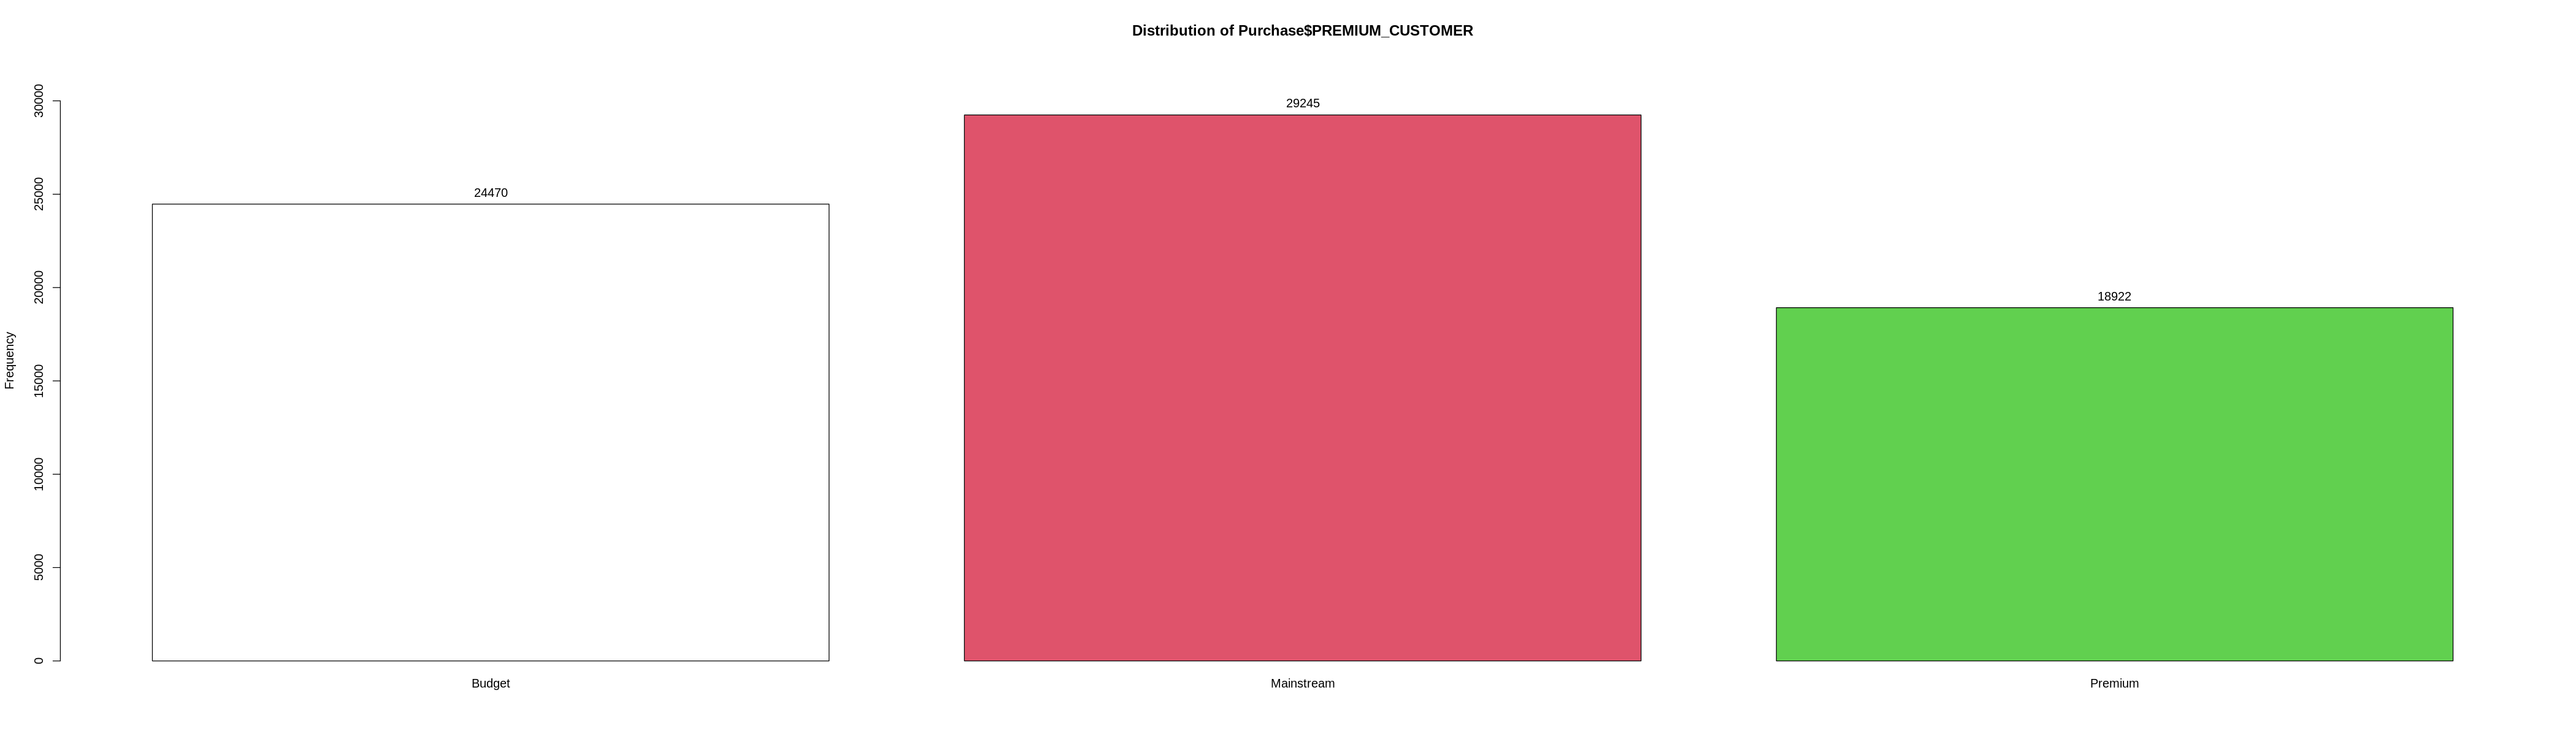

In [291]:
tab1(Purchase$PREMIUM_CUSTOMER)

In [292]:
Final_Data <- merge(Transactional_df, Purchase, by = 'LYLTY_CARD_NBR')

In [293]:
head(Final_Data)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,1000,2018-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
2,1002,2018-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
3,1003,2019-03-09,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
4,1003,2019-03-10,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
5,1004,2018-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream
6,1005,2018-12-30,1,6,86,Cheetos Puffs 165g,1,2.8,MIDAGE SINGLES/COUPLES,Mainstream


In [294]:
any(is.na(Final_Data))

[1] FALSE

### Data Analysis on consumer segment

Calculating the total sum of Sales from each entires from 'LIFESTAGE' column.

In [295]:
Total_sale_b_Lfsty <- aggregate(TOT_SALES~LIFESTAGE, Final_Data, sum)

Total_sale_b_Lfsty$LIFESTAGE <- as.factor(Total_sale_b_Lfsty$LIFESTAGE)

In [296]:
Total_sale_b_Lfsty

LIFESTAGE,TOT_SALES
<fct>,<dbl>
MIDAGE SINGLES/COUPLES,184751.30
NEW FAMILIES,50433.45
OLDER FAMILIES,353767.20
OLDER SINGLES/COUPLES,402426.75
RETIREES,366470.90
YOUNG FAMILIES,316160.10
YOUNG SINGLES/COUPLES,260405.30


Total sum of sales for each entries from 'PREMIUM_CUSTOMER'

In [297]:
Total_sale_b_Cust_seg <- aggregate(TOT_SALES~PREMIUM_CUSTOMER, Final_Data, sum)

Total_sale_b_Cust_seg$PREMIUM_CUSTOMER <- as.factor(Total_sale_b_Cust_seg$PREMIUM_CUSTOMER)

In [298]:
head(Total_sale_b_Cust_seg)

,PREMIUM_CUSTOMER,TOT_SALES
,<fct>,<dbl>
1,Budget,676211.6
2,Mainstream,750744.5
3,Premium,507459.0


### Plot of Total sales from each lifestages of the customer.

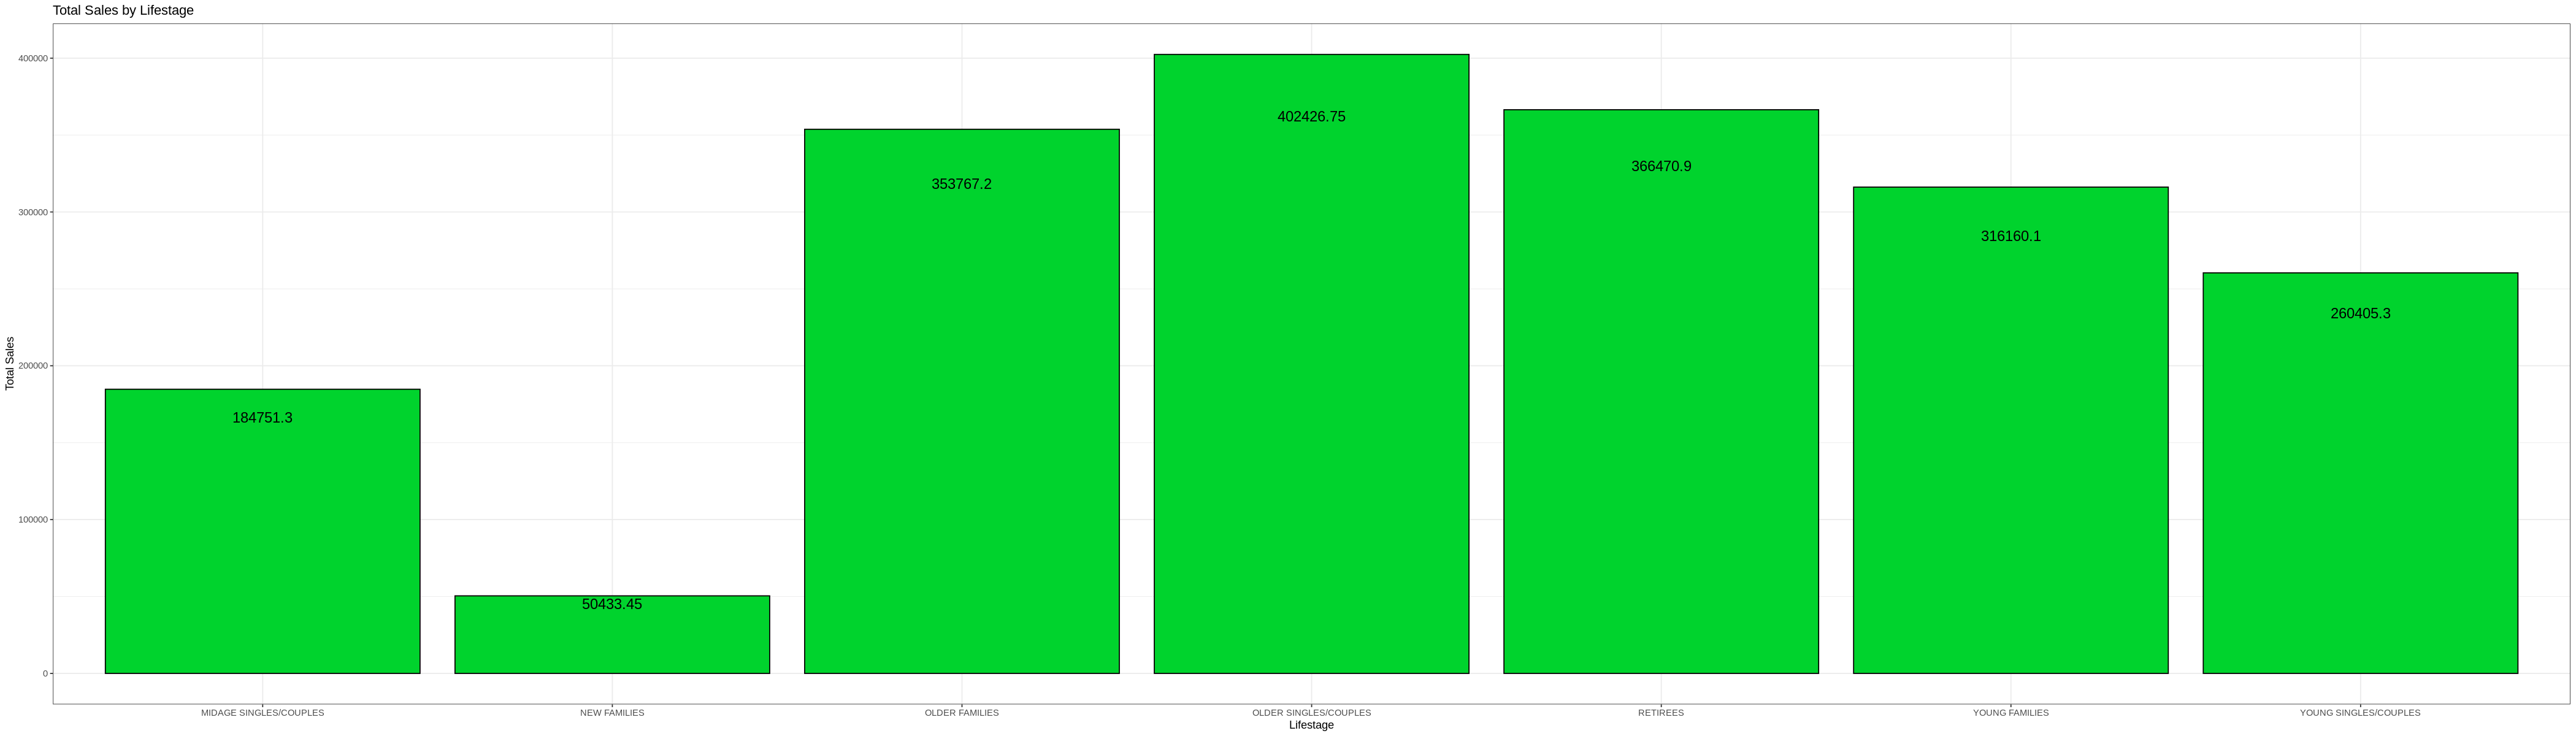

In [299]:
ggplot(Total_sale_b_Lfsty, aes(LIFESTAGE,TOT_SALES, label = TOT_SALES))+
geom_col(fill = "#00D32D", col = "Black")+
geom_text(size = 5, position = position_stack(vjust = 0.9))+
labs(x = "Lifestage", y = "Total Sales", title = "Total Sales by Lifestage")+
theme_bw()

### Plot of Total Sales from each Cutomer Segment

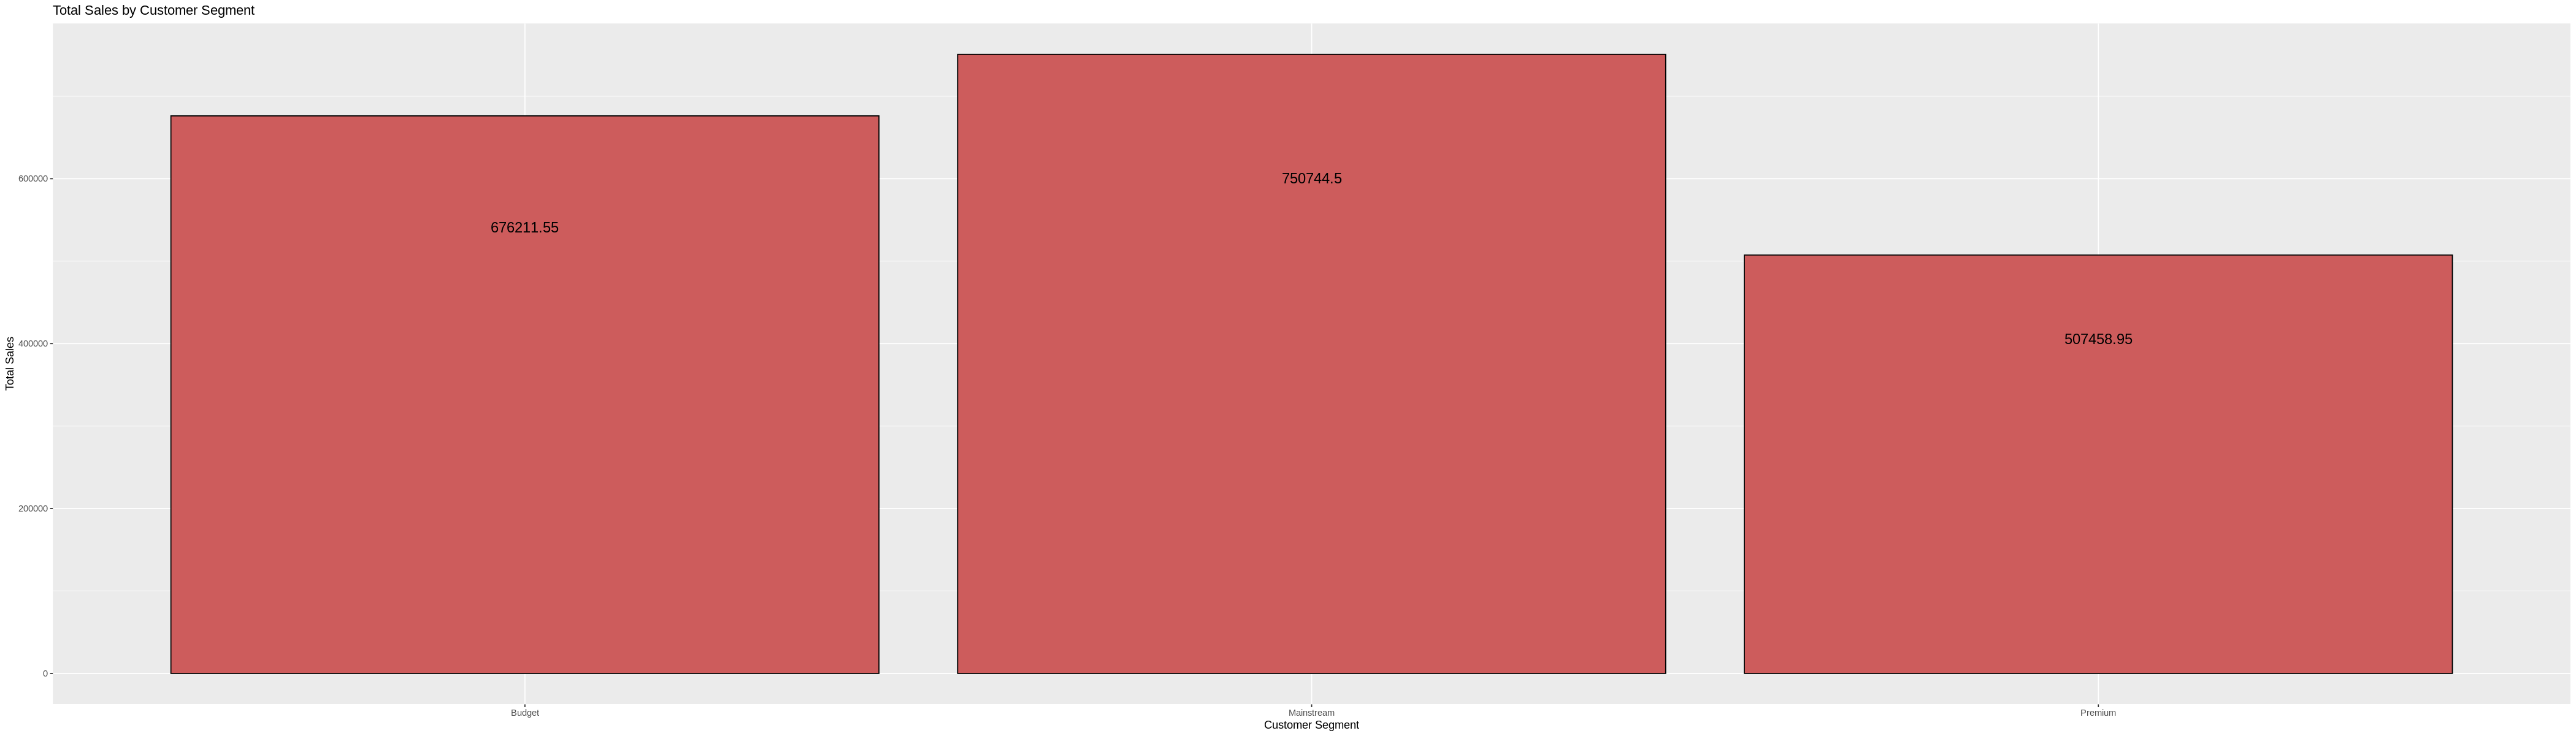

In [300]:
ggplot(Total_sale_b_Cust_seg, aes(PREMIUM_CUSTOMER, TOT_SALES, label = TOT_SALES))+
geom_col(fill = "#CD5C5C", col = "Black")+
geom_text(size = 5, position = position_stack(vjust = 0.8))+
labs(x = "Customer Segment", y = "Total Sales", title = "Total Sales by Customer Segment")

Calculating the total sales from each lifestage and Customer segment. 

In [301]:
Total_Lfestg_Cus_sgt <- aggregate(TOT_SALES~LIFESTAGE+PREMIUM_CUSTOMER, Final_Data, sum)

### Plot of total sales from each lifestage and Customer segment.

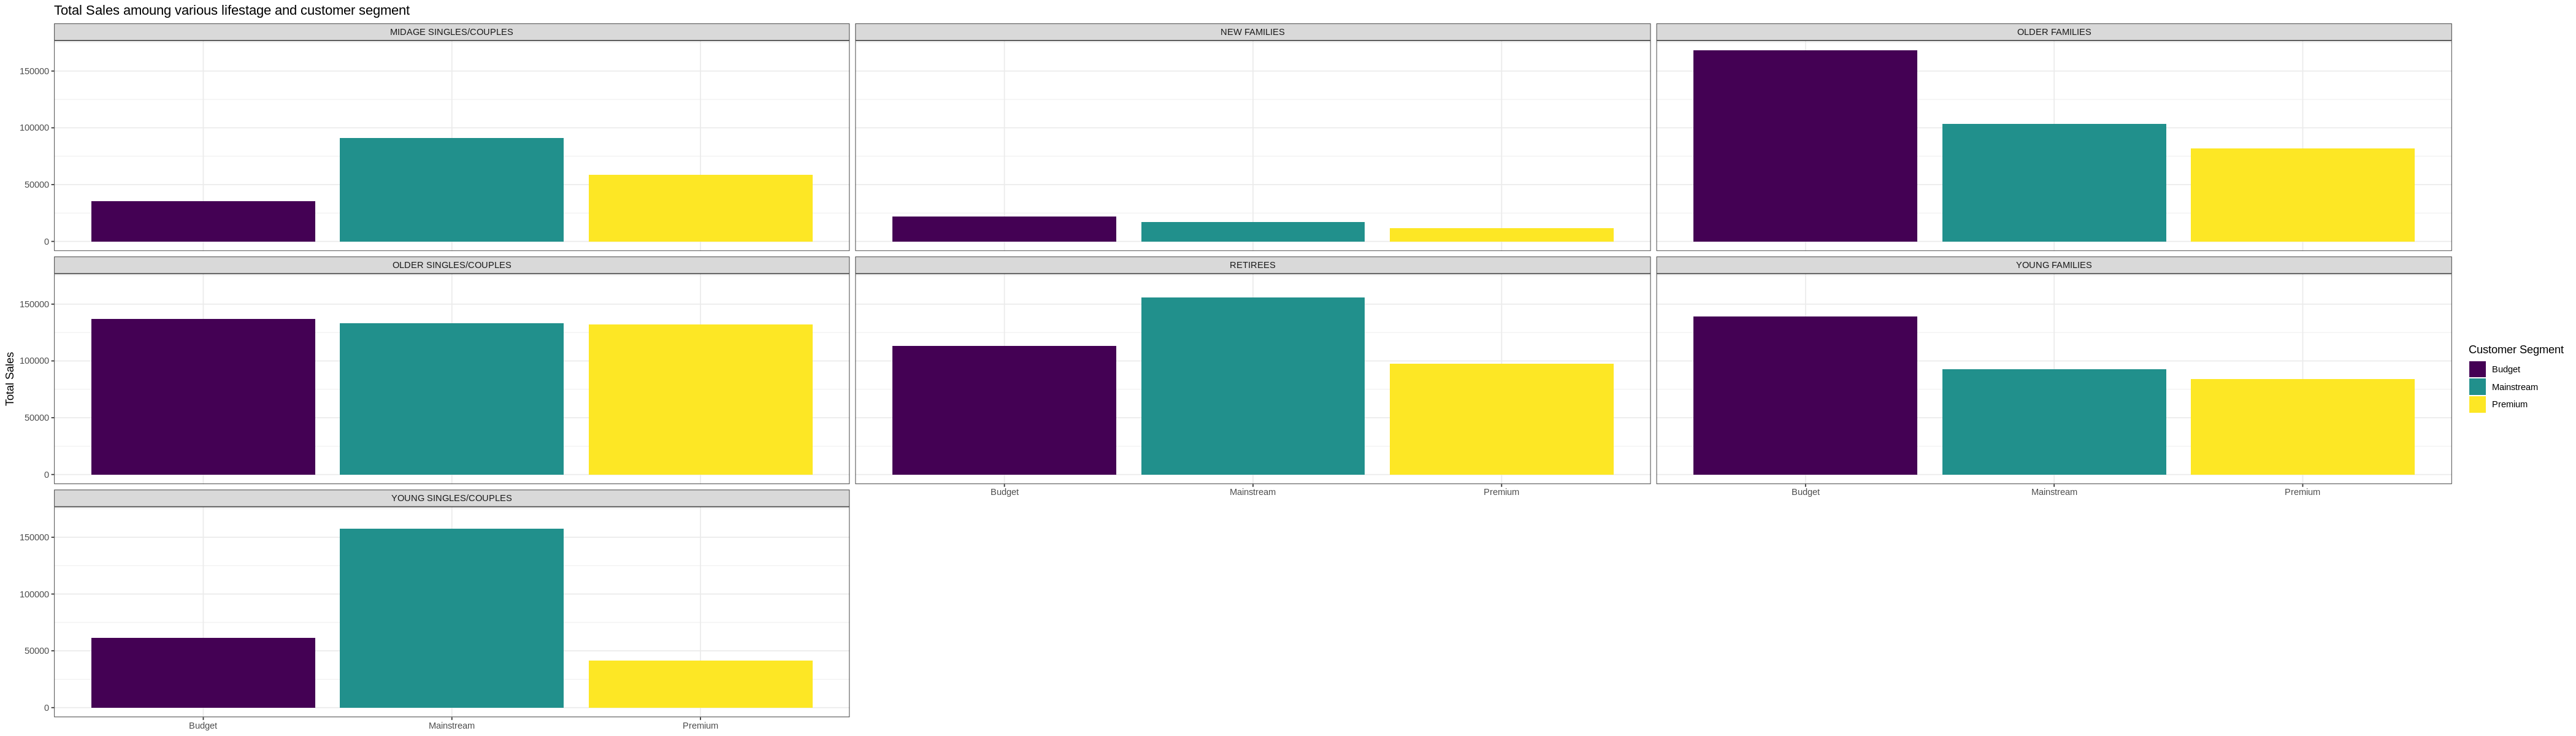

In [302]:
ggplot(Total_Lfestg_Cus_sgt, aes(x = PREMIUM_CUSTOMER, y = TOT_SALES))+
geom_bar(position = "dodge", stat = "identity", aes(fill = PREMIUM_CUSTOMER))+
facet_wrap(~LIFESTAGE)+
scale_color_viridis(discrete = T, option = "D")+
scale_fill_viridis(discrete = T, name = "Customer Segment")+
labs(y = "Total Sales", x = NULL, title = "Total Sales amoung various lifestage and customer segment")+
theme_bw()

Calculate the total number of products sold to each lifestages and the customer segment.

In [303]:
Total_qty_lfeseg <- aggregate(PROD_QTY~LIFESTAGE+PREMIUM_CUSTOMER,Final_Data, mean)

In [304]:
Total_qty_lfeseg

LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
<chr>,<chr>,<dbl>
MIDAGE SINGLES/COUPLES,Budget,1.891633
NEW FAMILIES,Budget,1.853910
OLDER FAMILIES,Budget,1.945812
OLDER SINGLES/COUPLES,Budget,1.913403
RETIREES,Budget,1.892244
YOUNG FAMILIES,Budget,1.940749
YOUNG SINGLES/COUPLES,Budget,1.803830
MIDAGE SINGLES/COUPLES,Mainstream,1.911656
NEW FAMILIES,Mainstream,1.857634


Plot of total number of products sold to each lifestages and the customer segment.

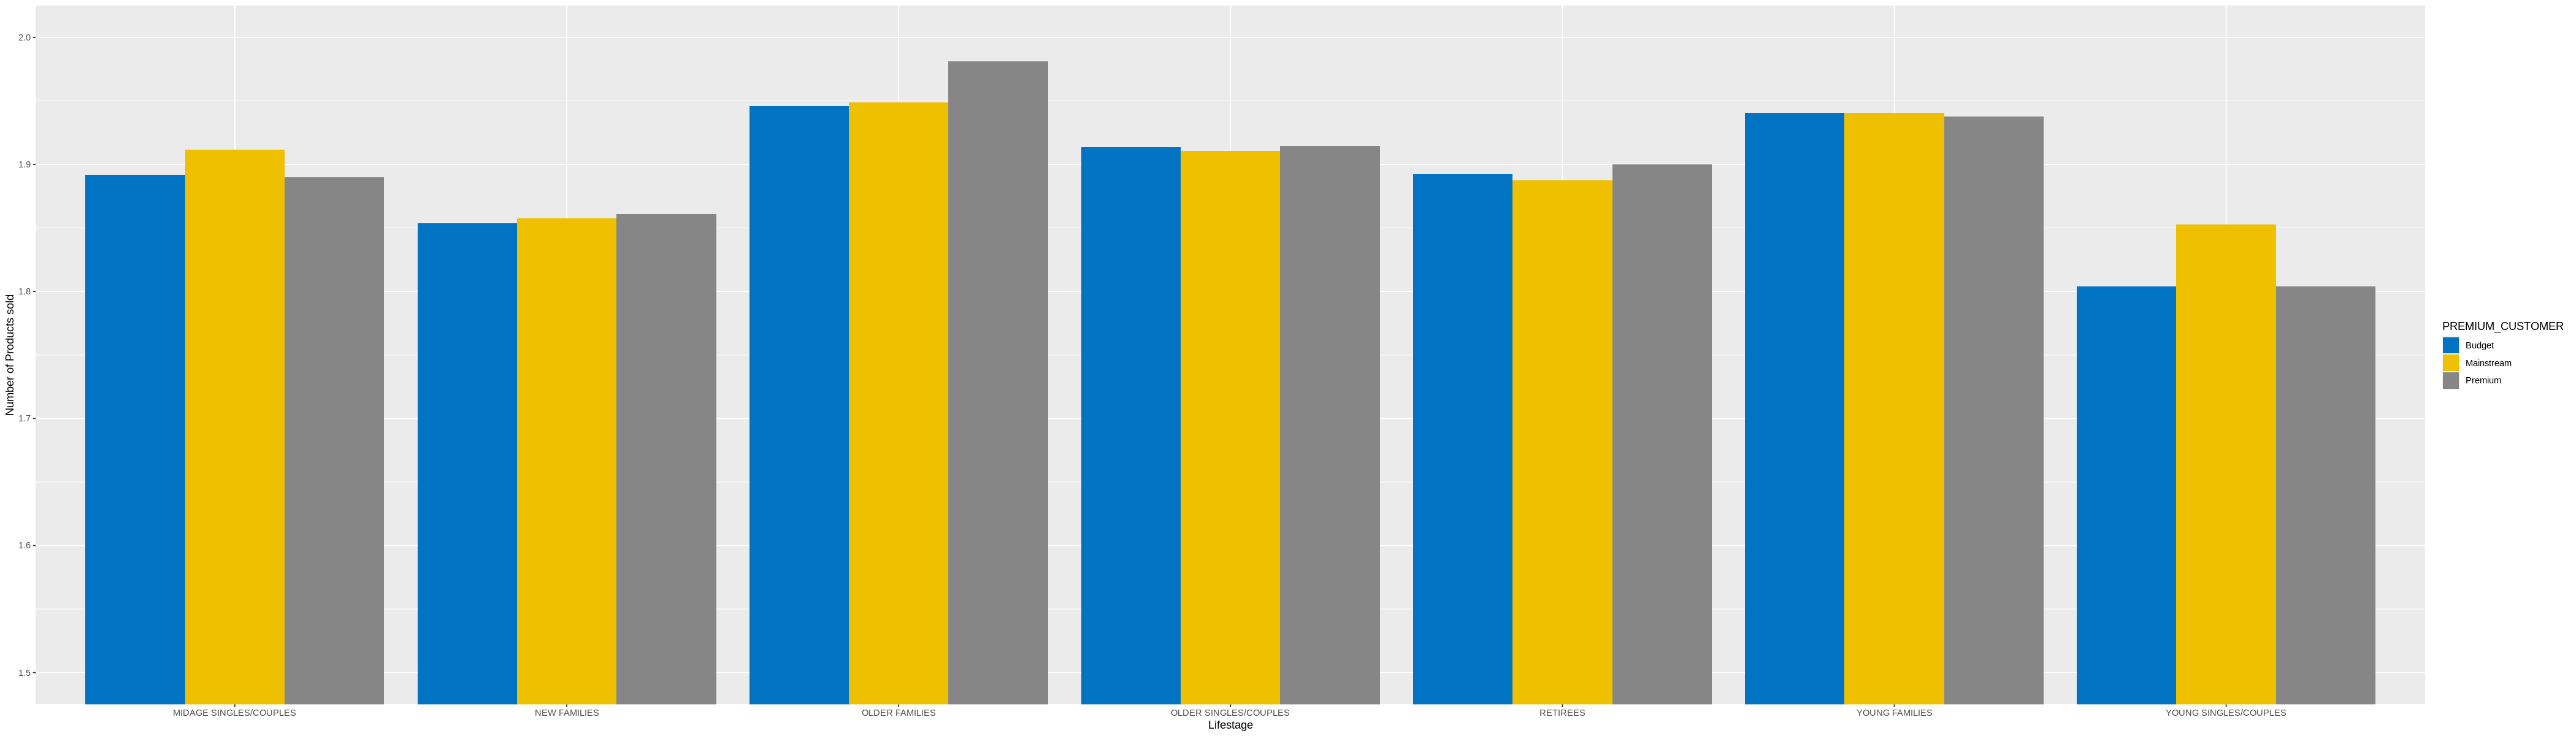

In [305]:
ggplot(Total_qty_lfeseg, aes(x = LIFESTAGE, y = PROD_QTY, fill = PREMIUM_CUSTOMER))+
  geom_bar(position = "dodge", stat = "identity")+
  scale_fill_jco()+
  coord_cartesian(ylim = c(1.5,2))+
  labs(y = "Number of Products sold", x = "Lifestage" )

Calculating the Average price spent on each sales transaction.

In [306]:
Final_Data$Per_Unit_Spend <- Final_Data$TOT_SALES/Final_Data$PROD_QTY

In [307]:
head(Final_Data)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Per_Unit_Spend
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,1000,2018-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,3.0
2,1002,2018-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,2.7
3,1003,2019-03-09,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget,3.6
4,1003,2019-03-10,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget,3.0
5,1004,2018-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream,1.9
6,1005,2018-12-30,1,6,86,Cheetos Puffs 165g,1,2.8,MIDAGE SINGLES/COUPLES,Mainstream,2.8


Selecting only relvent columns

In [308]:
Final_Data_Selected <- select(Final_Data, c("PREMIUM_CUSTOMER", "LIFESTAGE", "PROD_QTY", "TOT_SALES", "Per_Unit_Spend"))

In [309]:
head(Final_Data_Selected)

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY,TOT_SALES,Per_Unit_Spend
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Premium,YOUNG SINGLES/COUPLES,2,6.0,3.0
2,Mainstream,YOUNG SINGLES/COUPLES,1,2.7,2.7
3,Budget,YOUNG FAMILIES,1,3.6,3.6
4,Budget,YOUNG FAMILIES,1,3.0,3.0
5,Mainstream,OLDER SINGLES/COUPLES,1,1.9,1.9
6,Mainstream,MIDAGE SINGLES/COUPLES,1,2.8,2.8


In [310]:
dim(Final_Data_Selected)

[1] 264836      5

Calculating the average of per unit spend for each customer segment and lifestage. 

In [311]:
Per_Unit_Spend_seg_Lystyle <-aggregate(Per_Unit_Spend~PREMIUM_CUSTOMER+LIFESTAGE, Final_Data_Selected, mean)

In [312]:
head(Per_Unit_Spend_seg_Lystyle)

,PREMIUM_CUSTOMER,LIFESTAGE,Per_Unit_Spend
,<chr>,<chr>,<dbl>
1,Budget,MIDAGE SINGLES/COUPLES,3.728496
2,Mainstream,MIDAGE SINGLES/COUPLES,4.000101
3,Premium,MIDAGE SINGLES/COUPLES,3.752915
4,Budget,NEW FAMILIES,3.919251
5,Mainstream,NEW FAMILIES,3.916581
6,Premium,NEW FAMILIES,3.871743


In [313]:
Per_Unit_Spend_seg_Lystyle

PREMIUM_CUSTOMER,LIFESTAGE,Per_Unit_Spend
<chr>,<chr>,<dbl>
Budget,MIDAGE SINGLES/COUPLES,3.728496
Mainstream,MIDAGE SINGLES/COUPLES,4.000101
Premium,MIDAGE SINGLES/COUPLES,3.752915
Budget,NEW FAMILIES,3.919251
Mainstream,NEW FAMILIES,3.916581
Premium,NEW FAMILIES,3.871743
Budget,OLDER FAMILIES,3.733344
Mainstream,OLDER FAMILIES,3.727383
Premium,OLDER FAMILIES,3.704543


#### Plot of the average of per unit spend for each customer segment and lifestage. 

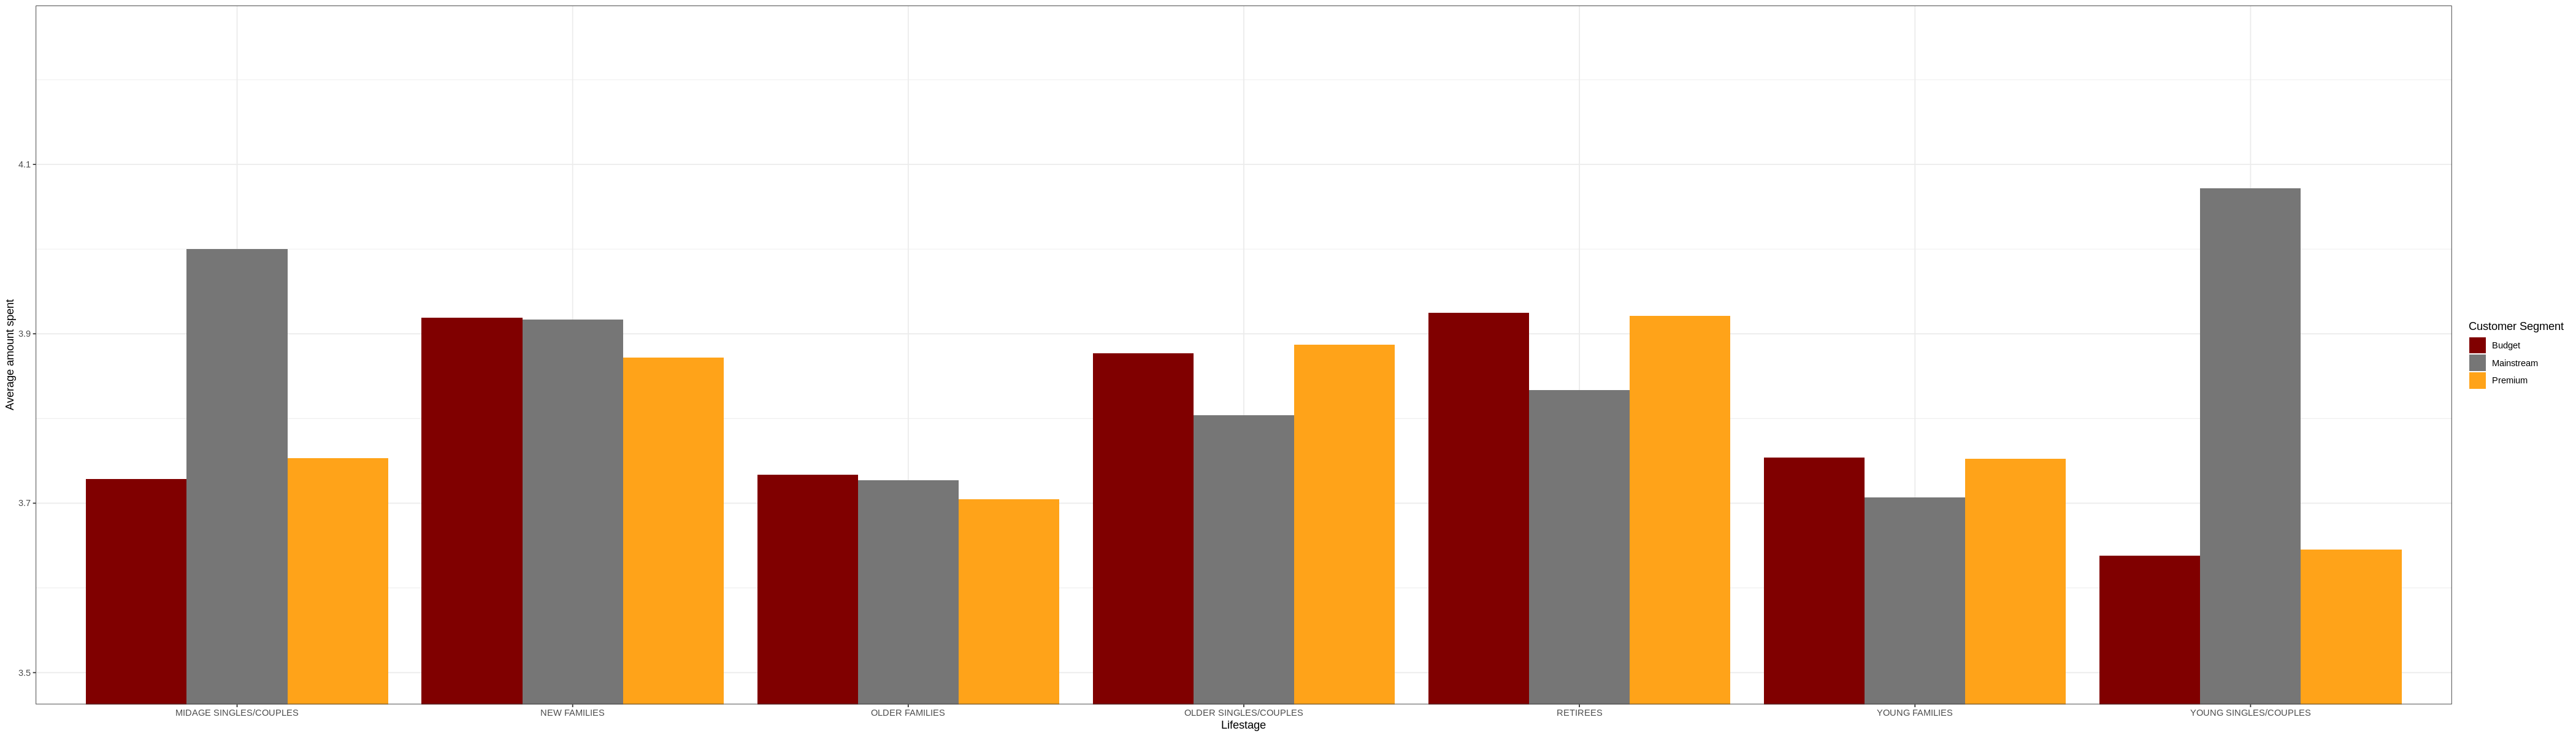

In [314]:
ggplot(Per_Unit_Spend_seg_Lystyle, aes(x = LIFESTAGE, y = Per_Unit_Spend, fill = PREMIUM_CUSTOMER))+
  geom_bar(position = "dodge", stat = "identity")+
  coord_cartesian(ylim = c(3.5,4.25))+
  labs(x = "Lifestage", y = "Average amount spent")+
  scale_fill_uchicago(name = "Customer Segment")+
  theme_bw()

### Filtering Mainstream customer who are in the 'MIDAGE SINGLES/COUPLES' or 'YOUNG SINGLES/COUPLES' lifestage.

In [315]:
y1 <- dplyr::filter(Per_Unit_Spend_seg_Lystyle, PREMIUM_CUSTOMER == "Mainstream" & (LIFESTAGE == "MIDAGE SINGLES/COUPLES" | LIFESTAGE == "YOUNG SINGLES/COUPLES"))

In [316]:
head(y1)

,PREMIUM_CUSTOMER,LIFESTAGE,Per_Unit_Spend
,<chr>,<chr>,<dbl>
1,Mainstream,MIDAGE SINGLES/COUPLES,4.000101
2,Mainstream,YOUNG SINGLES/COUPLES,4.071485


### Filtering premium customer who are in the 'MIDAGE SINGLES/COUPLES' or 'YOUNG SINGLES/COUPLES' lifestage.

In [317]:
y2 <- dplyr::filter(Per_Unit_Spend_seg_Lystyle, (PREMIUM_CUSTOMER == "Premium" | PREMIUM_CUSTOMER == "Budget") & (LIFESTAGE == "MIDAGE SINGLES/COUPLES" | LIFESTAGE == "YOUNG SINGLES/COUPLES"))

In [318]:
head(y2)

,PREMIUM_CUSTOMER,LIFESTAGE,Per_Unit_Spend
,<chr>,<chr>,<dbl>
1,Budget,MIDAGE SINGLES/COUPLES,3.728496
2,Premium,MIDAGE SINGLES/COUPLES,3.752915
3,Budget,YOUNG SINGLES/COUPLES,3.637681
4,Premium,YOUNG SINGLES/COUPLES,3.645518


#### t-test to check if the difference between between mainstream vs premium and budget midage young singles and couples is statistically significant. 

In [319]:
t.test(y1$Per_Unit_Spend,y2$Per_Unit_Spend, paired = F, var.equal = T, alternative = "greater")


	Two Sample t-test

data:  y1$Per_Unit_Spend and y2$Per_Unit_Spend
t = 7.063, df = 4, p-value = 0.00106
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.2406159       Inf
sample estimates:
mean of x mean of y 
 4.035793  3.691153 


Since the p< 5%, the unit price for mainstream, young and mid-age singles and
couples are significantly higher than that of budget or premium, young and midage singles and couples.

### Cleaning of Data for affinity and a-priori analysis

In [321]:
Final_Data$Pack_Size <- as.numeric(stringr::str_extract_all(Final_Data$PROD_NAME, "\\d+\\.*\\d*"))

In [322]:
Final_Data <- Final_Data %>%
  separate(PROD_NAME, into = "BRAND_NAME")

In [323]:
Final_Data$`BRAND NAME`<- sub(".*Dorito.*", "Doritos", Brand$`BRAND NAME`)
Final_Data$`BRAND NAME`<- sub(".*Infzns.*", "Infuzions", Brand$`BRAND NAME`)
Final_Data$`BRAND NAME`<- sub(".*RRD.*", "Red", Brand$`BRAND NAME`)
Final_Data$`BRAND NAME`<- sub(".*Snbts.*", "Sunbites", Brand$`BRAND NAME`)
Final_Data$`BRAND NAME`<- sub(".*WW.*", "Woolworths", Brand$`BRAND NAME`)
Final_Data$`BRAND NAME`<- sub(".*Smith.*", "Smiths", Brand$`BRAND NAME`)

In [324]:
 MainStreamCustomerYSC <- dplyr::filter(Final_Data, PREMIUM_CUSTOMER =="Mainstream" & LIFESTAGE == "YOUNG SINGLES/COUPLES")

In [325]:
NotMainStreamCustomerYSC <- dplyr::filter(Final_Data, PREMIUM_CUSTOMER !="Mainstream" & LIFESTAGE !="YOUNG SINGLES/COUPLES")



1.   Affinity Analysis

In [326]:
Segment_Quanity <- sum(MainStreamCustomerYSC$PROD_QTY)

OtherSegment_Quanity <- sum(NotMainStreamCustomerYSC$PROD_QTY)

In [327]:
TargetSegement1 <- aggregate(PROD_QTY~BRAND_NAME, MainStreamCustomerYSC, sum)

TargetSegement2 <- aggregate(PROD_QTY~BRAND_NAME, NotMainStreamCustomerYSC, sum)

In [328]:
Affinity_df <- merge(TargetSegement1, TargetSegement2, by = 'BRAND_NAME')

In [329]:
head(Affinity_df)

,BRAND_NAME,PROD_QTY.x,PROD_QTY.y
,<chr>,<dbl>,<dbl>
1,Burger,106,1723
2,CCs,405,4861
3,Cheetos,291,3099
4,Cheezels,651,4982
5,Cobs,1617,10133
6,Dorito,569,3789


In [330]:
Affinity_df$Tar_Segement1 <- Affinity_df$PROD_QTY.x/Segment_Quanity

Affinity_df$Tar_Segement2 <- Affinity_df$PROD_QTY.y/OtherSegment_Quanity

In [331]:
Affinity_df$AffinityToBrand <- Affinity_df$Tar_Segement1/Affinity_df$Tar_Segement2

In [332]:
head(Affinity_df)

,BRAND_NAME,PROD_QTY.x,PROD_QTY.y,Tar_Segement1,Tar_Segement2,AffinityToBrand
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Burger,106,1723,0.002743839,0.006084963,0.4509212
2,CCs,405,4861,0.010483537,0.017167155,0.6106741
3,Cheetos,291,3099,0.007532615,0.010944458,0.6882584
4,Cheezels,651,4982,0.016851315,0.017594479,0.9577615
5,Cobs,1617,10133,0.041856492,0.035785801,1.1696397
6,Dorito,569,3789,0.014728722,0.013381269,1.1006970


In [333]:
Affinity_df[order(-Affinity_df$AffinityToBrand),]

,BRAND_NAME,PROD_QTY.x,PROD_QTY.y,Tar_Segement1,Tar_Segement2,AffinityToBrand
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,Tyrrells,1143,6777,0.029586871,0.023933719,1.2362003
26,Twisties,1673,9997,0.043306068,0.035305502,1.2266096
13,Kettle,7172,43896,0.185649203,0.155023538,1.1975549
12,Infzns,541,3313,0.014003935,0.011700223,1.1968947
25,Tostitos,1645,10107,0.042581280,0.035693979,1.1929541
16,Old,1607,9877,0.041597639,0.034881709,1.1925344
17,Pringles,4326,26647,0.111979706,0.094106803,1.1899215
9,Grain,1055,6560,0.027308967,0.023167359,1.1787691
5,Cobs,1617,10133,0.041856492,0.035785801,1.1696397


We can conclude that:

* Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population
* Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population


Let’s also find out if our target segment tends to buy larger packs of chips.


In [339]:
TargetSegementPack1 <- aggregate(PROD_QTY~Pack_Size, MainStreamCustomerYSC, sum)

TargetSegementPack2 <- aggregate(PROD_QTY~Pack_Size, NotMainStreamCustomerYSC, sum)

In [341]:
AffinityPack_df <- merge(TargetSegementPack1, TargetSegementPack2, by = 'Pack_Size')

In [344]:
AffinityPack_df <- AffinityPack_df[complete.cases(AffinityPack_df),]

In [353]:
head(AffinityPack_df)

,Pack_Size,PROD_QTY.x,PROD_QTY.y,Tar_Segement1,Tar_Segement2,AffinityToBrand
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,70,110,1656,0.002847380,0.005848346,0.4868694
2,90,230,3324,0.005953614,0.011739071,0.5071623
3,110,3850,23607,0.099658314,0.083370710,1.1953636
4,125,109,1575,0.002821495,0.005562285,0.5072547
5,134,4326,26647,0.111979706,0.094106803,1.1899215
6,135,535,3408,0.013848623,0.012035726,1.1506263


In [347]:
AffinityPack_df$Tar_Segement1 <- AffinityPack_df$PROD_QTY.x/Segment_Quanity
 
AffinityPack_df$Tar_Segement2 <- AffinityPack_df$PROD_QTY.y/OtherSegment_Quanity

In [352]:
AffinityPack_df$AffinityToBrand <- AffinityPack_df$Tar_Segement1/AffinityPack_df$Tar_Segement2

In [354]:
AffinityPack_df[order(-AffinityPack_df$AffinityToBrand),]

,Pack_Size,PROD_QTY.x,PROD_QTY.y,Tar_Segement1,Tar_Segement2,AffinityToBrand
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,270,1153,6607,0.029845724,0.023333345,1.2791018
20,330,2220,13434,0.057465314,0.047443644,1.2112331
3,110,3850,23607,0.099658314,0.083370710,1.1953636
21,380,1165,7176,0.030156347,0.025342831,1.1899360
5,134,4326,26647,0.111979706,0.094106803,1.1899215
15,210,1055,6560,0.027308967,0.023167359,1.1787691
6,135,535,3408,0.013848623,0.012035726,1.1506263
17,250,520,3390,0.013460344,0.011972157,1.1243040
10,170,2926,21175,0.075740319,0.074781835,1.0128171


It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population.

2. Apriori Analysis

In [ ]:
Final_Data_tr <- select(Final_Data, c("LYLTY_CARD_NBR","BRAND_NAME",))

In [ ]:
head(Final_Data_tr)

,LYLTY_CARD_NBR,BRAND_NAME
,<dbl>,<chr>
1,1002,Red
2,1010,Doritos
3,1010,Old
4,1018,Infuzions
5,1018,Kettle
6,1018,RRD


In [ ]:
Final_Data_transactional <-Final_Data_tr %>%
                              group_by(LYLTY_CARD_NBR, BRAND_NAME)%>%
                              mutate(y = paste(LYLTY_CARD_NBR, sep = ","))%>%
                              group_by(y)%>%
                              summarise(BRAND_NAMES = paste(BRAND_NAME, collapse = ','))

In [ ]:
head(Final_Data_transactional)

y,BRAND_NAMES
<chr>,<chr>
100039,"Tyrrells,Smiths,RRD,Pringles,RRD,Sunbites,Doritos"
100044,"Doritos,Natural,Smiths,Kettle,WW,Red,Natural"
100047,"Smiths,Doritos,Doritos,Smiths,NCC,RRD"
100057,"Kettle,Cheezels,Kettle,Natural,Smiths,Tostitos,Kettle"
100070,Doritos
100079,"Doritos,Doritos,RRD,Twisties,Kettle,Tostitos"


Removing 'y' column, which contains Customer ID, Since the column is not important for a-priori analysis

In [ ]:
Final_Data_transactional <- select(Final_Data_transactional, -"y")

Converting Dataframe to transactional object. 

In [ ]:
Final_Data_transactional<-as(Final_Data_transactional,"transactions")

In [ ]:
Final_Data_transactional

transactions in sparse format with
 8088 transactions (rows) and
 3137 items (columns)

In [ ]:
summary(Final_Data_transactional)

transactions as itemMatrix in sparse format with
 8088 rows (elements/itemsets/transactions) and
 3137 columns (items) and a density of 0.0003187759 

most frequent items:
  BRAND_NAMES=Kettle BRAND_NAMES=Pringles  BRAND_NAMES=Doritos 
                 579                  336                  317 
  BRAND_NAMES=Smiths    BRAND_NAMES=Thins              (Other) 
                 221                  164                 6471 

element (itemset/transaction) length distribution:
sizes
   1 
8088 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

includes extended item information - examples:
                      labels   variables         levels
1         BRAND_NAMES=Burger BRAND_NAMES         Burger
2     BRAND_NAMES=Burger,CCs BRAND_NAMES     Burger,CCs
3 BRAND_NAMES=Burger,Doritos BRAND_NAMES Burger,Doritos

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             3

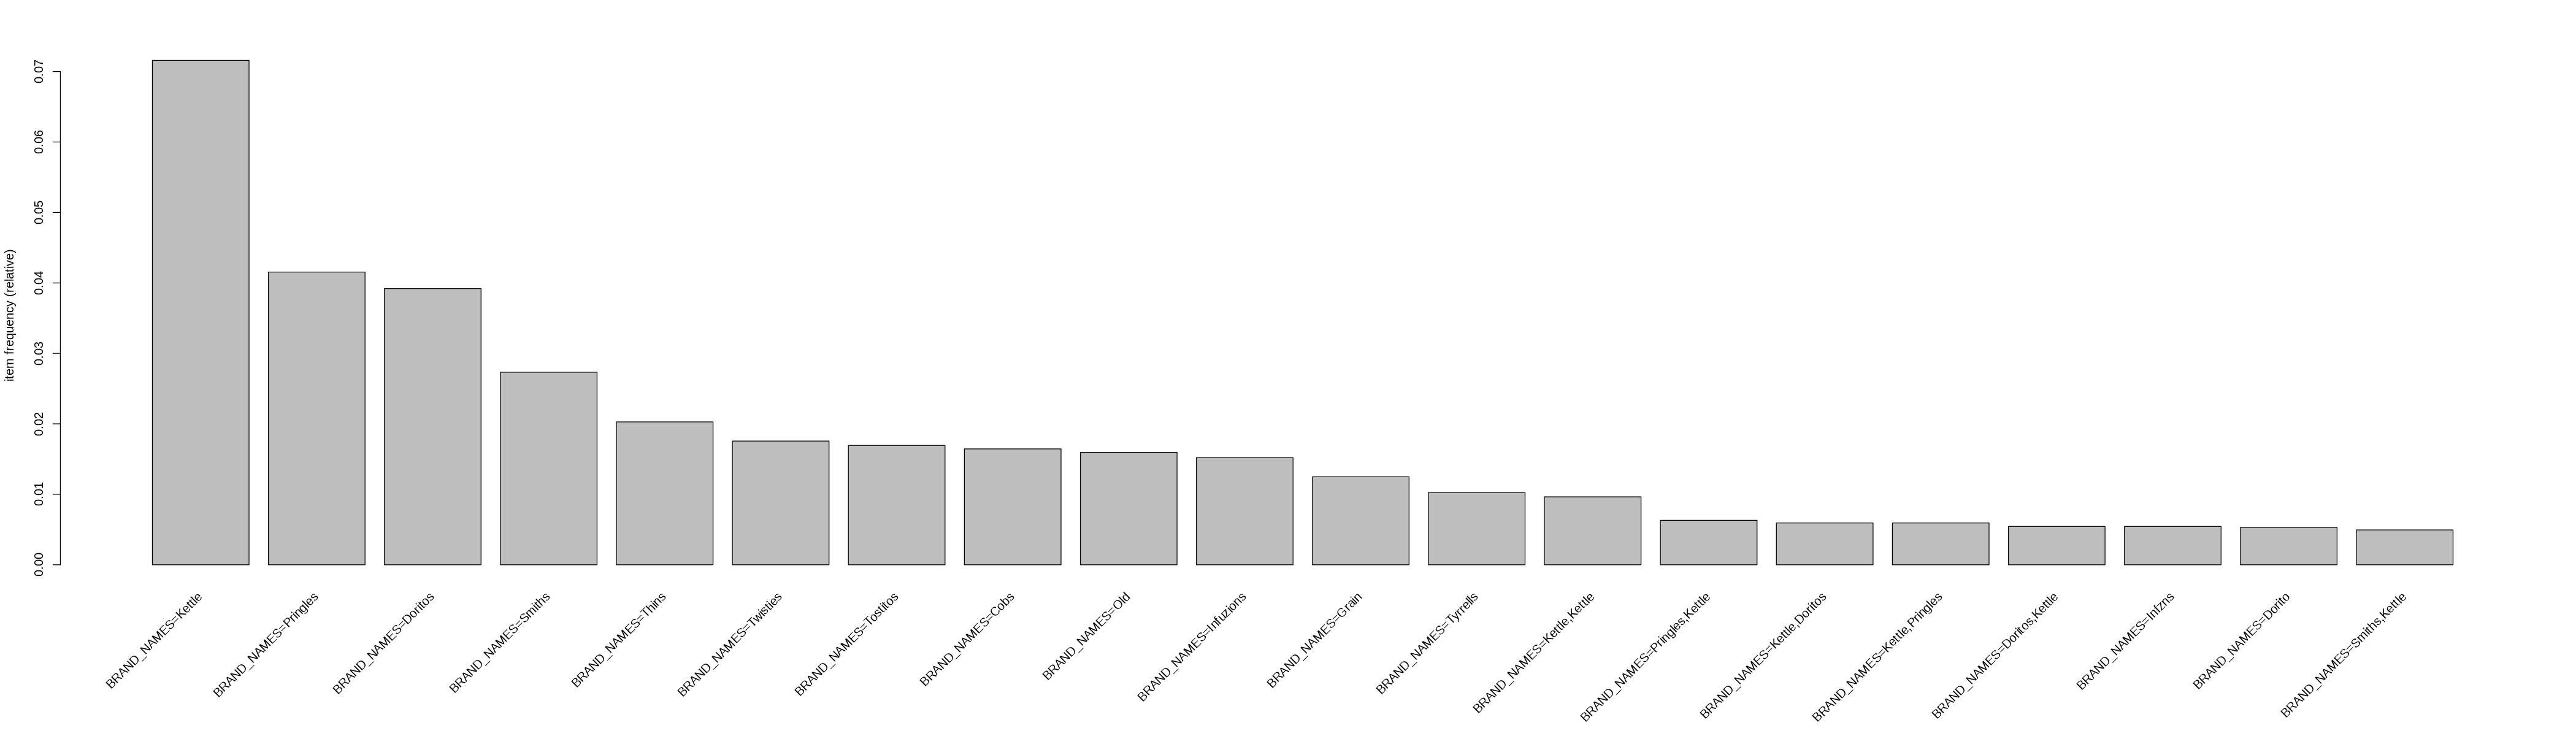

In [ ]:
itemFrequencyPlot(Final_Data_transactional, topN = 20)

In [ ]:
rules <-apriori(Final_Data_tr, parameter = list(supp = 0.1, conf = 0.1, maxlen = 10))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2085 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[32 item(s), 20854 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
inspect(rules)

    lhs    rhs                                  support   confidence coverage
[1] {}  => {BRAND_NAME=Doritos}                 0.1073175 0.1073175  1       
[2] {}  => {BRAND_NAME=Pringles}                0.1110099 0.1110099  1       
[3] {}  => {BRAND_NAME=Kettle}                  0.1843291 0.1843291  1       
[4] {}  => {LYLTY_CARD_NBR=[1e+03,8.6e+04)}     0.3329337 0.3329337  1       
[5] {}  => {LYLTY_CARD_NBR=[8.6e+04,1.79e+05)}  0.3334612 0.3334612  1       
[6] {}  => {LYLTY_CARD_NBR=[1.79e+05,2.37e+06]} 0.3336051 0.3336051  1       
    lift count
[1] 1    2238 
[2] 1    2315 
[3] 1    3844 
[4] 1    6943 
[5] 1    6954 
[6] 1    6957 


Visual representation of the Rules

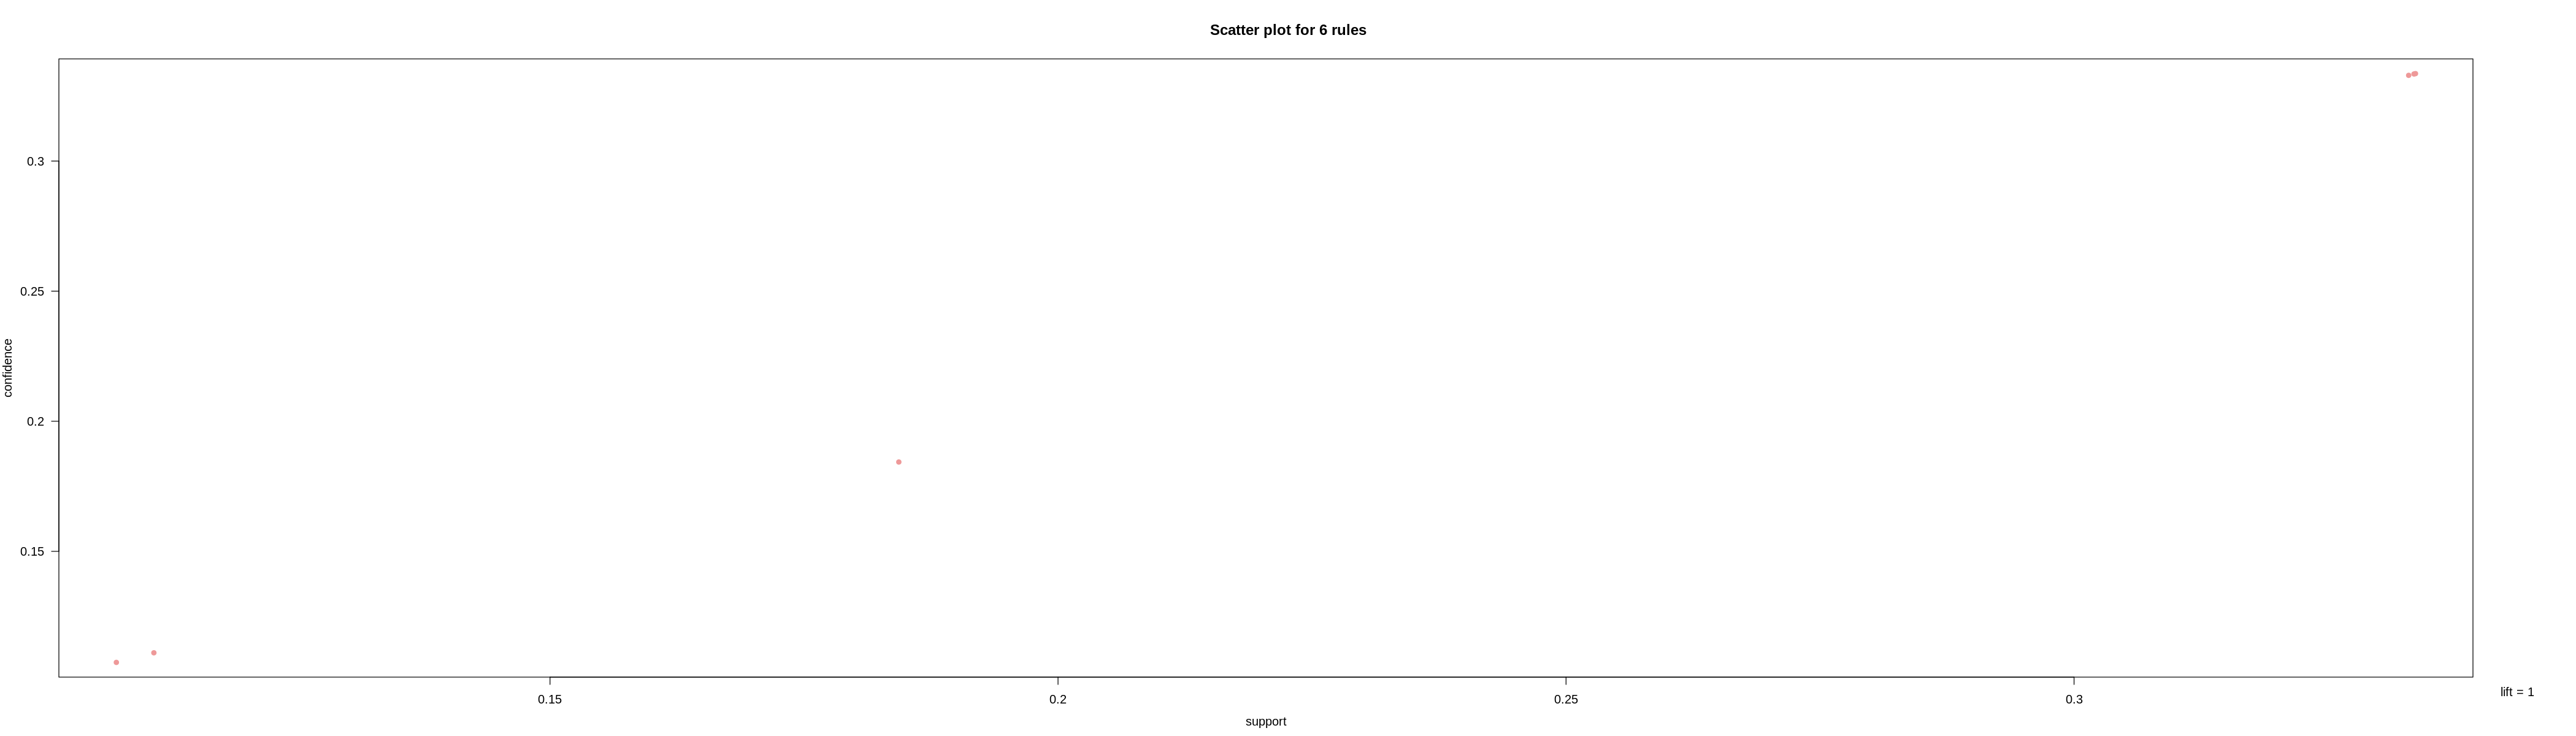

In [ ]:
plot(rules)